<a href="https://colab.research.google.com/github/fbeilstein/algorithms/blob/master/Skiplist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

A **skip list** (or **skiplist**) is a probabilistic data structure that allows
$O(\log n)$ average complexity for search as well as $O(\log n)$
average complexity for insertion within an ordered sequence of
$n$ elements. Thus it can get the best features of a sorted array (for searching) while maintaining a linked list-like structure that allows insertion, which is not possible with a static array. Fast search is made possible by maintaining a linked hierarchy of subsequences, with each successive subsequence skipping over fewer elements than the previous one (see the picture below on the right). Searching starts in the sparsest subsequence until two consecutive elements have been found, one smaller and one larger than or equal to the element searched for. Via the linked hierarchy, these two elements link to elements of the next sparsest subsequence, where searching is continued until finally searching in the full sequence.



In [ ]:
#@title Skip list
%%html

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
 </g>
</svg>


Сompetitors:

* AVL trees
* 2-3 trees
* Splay trees

Here's performance comparison from the original paper:

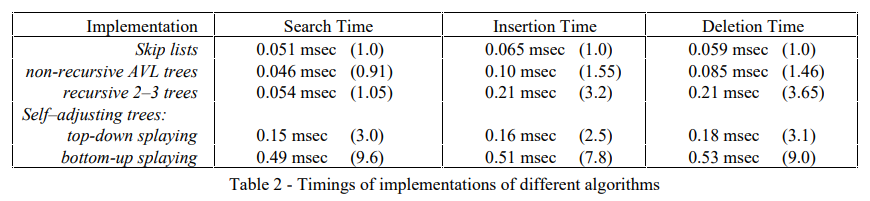

The skip list was invented in 1989 by William Pugh.

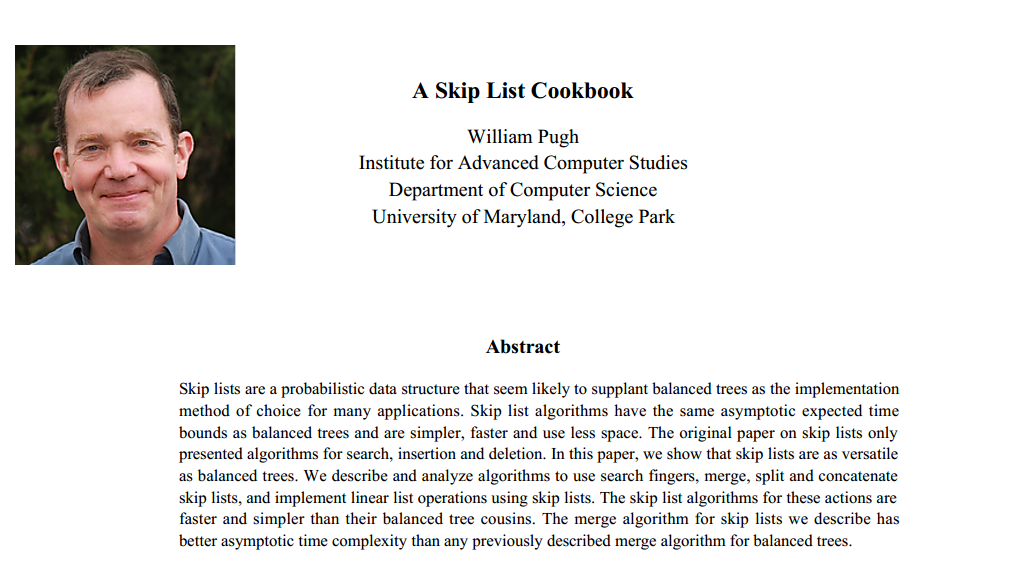

## Papers:

* [William Pugh, Skip Lists: A Probabilistic Alternative to Balanced Trees, Proceedings of the Algorithms and Data Structures, Ottawa Canada, August 1989 (to appear in Comm. ACM)](https://15721.courses.cs.cmu.edu/spring2018/papers/08-oltpindexes1/pugh-skiplists-cacm1990.pdf)
* [William Pugh. "A skip list cookbook". 1990.](https://scheme.inlab.net/reference-manual/data-types/skiplist.files/A-Skip-List-Cookbook.pdf)

Skip list implements following operations:
* find element;
* insert element;
* delete element;
* linear list operations ($k$-th element).

using more or less the same branching block:

# Ideal skiplist



In [ ]:
#@title Ideal Skip list
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="504.71mm" height="44.744mm" version="1.1" viewBox="0 0 1182.1 81.35" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-76" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-3-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-8-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-3-6" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-8-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-3-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-8-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-3-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-8-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-3-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-8-2-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-3-2-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-8-2-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-4-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-0-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-3-2-0-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-8-2-3-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-9-8-7-1-9-3-2-0-98" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2-4-7-1-2-8-2-3-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-4-1-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-0-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(133.01 50.478)">
  <rect transform="scale(-1,1)" x="27.743" y="15.168" width="25.658" height="25.658" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <g transform="matrix(1.3106,0,0,1.3106,70.399,202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21,-128.12)"></g>
  </g>
  <rect transform="scale(-1,1)" x="2.0847" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <path d="m-93.983 2.3796h118.16" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.61969;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <path d="m-92.367-23.319h276.57" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.61969;stroke:#000000"/>
  <path d="m-94.746 28.114h40.188" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.61969;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <path d="m224.56-22.495h292.41" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.61969;stroke:#000000"/>
  <path d="m-92.516-48.735h609.37" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.61969;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-1048.7" y="-61.799" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-51.578" y="-10.49" width="25.658" height="51.316" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.80874;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-77.236" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-77.236" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-132.06" y="15.286" width="25.658" height="25.658" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-157.72" y="15.286" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-212.13" y="-36.267" width="25.658" height="76.978" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.80899;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-237.79" y="15.053" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-237.79" y="-10.605" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-237.79" y="-36.263" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-292.52" y="14.594" width="25.658" height="25.658" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-318.18" y="14.594" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.8" y="-11.039" width="25.658" height="51.29" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.80854;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-402.45" y="14.594" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-402.45" y="-11.064" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-462.24" y="14.712" width="25.658" height="25.658" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-487.9" y="14.712" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-545.74" y="-60.192" width="25.658" height="102.23" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-571.4" y="16.384" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-571.4" y="-9.2735" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-571.4" y="-34.932" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-571.4" y="-60.59" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-631.15" y="16.417" width="25.658" height="25.658" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <path d="m728.52 5.5257h126.22" style="fill:none;marker-end:url(#Arrow1Mend-4);marker-start:url(#DotM-1);stroke-width:.62174;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-656.8" y="16.417" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <path d="m560.01 4.9701h127.82" style="fill:none;marker-end:url(#Arrow1Mend-0-0);marker-start:url(#DotM-7-4);stroke-width:.61969;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-715.42" y="-9.241" width="25.658" height="51.316" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.80874;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-741.08" y="16.417" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-741.08" y="-9.241" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-798.39" y="16.535" width="25.658" height="25.658" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-824.05" y="16.535" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-882.17" y="-35.014" width="25.658" height="76.974" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.80896;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-907.83" y="16.302" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-907.83" y="-9.3557" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-907.83" y="-35.014" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-965.04" y="15.843" width="25.658" height="25.658" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-990.7" y="15.843" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.8056;stroke:#aeaeae"/>
  <path d="m-14.87 28.876h40.188" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2);marker-start:url(#DotM-4-7-9);stroke-width:.61969;stroke:#000000"/>
  <path d="m65.465 27.462h40.188" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4);marker-start:url(#DotM-4-7-9-8);stroke-width:.61969;stroke:#000000"/>
  <path d="m145.27 28.572h40.188" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7);marker-start:url(#DotM-4-7-9-8-7);stroke-width:.61969;stroke:#000000"/>
  <path d="m64.817 3.5564h119.4" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.61969;stroke:#000000"/>
  <path d="m225.45 27.953h40.188" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1);marker-start:url(#DotM-4-7-9-8-7-1);stroke-width:.61969;stroke:#000000"/>
  <path d="m225.08 3.1145h124.27" style="fill:none;marker-end:url(#Arrow1Mend-2);marker-start:url(#DotM-76);stroke-width:.61969;stroke:#000000"/>
  <path d="m305.91 28.313h43.494" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2);marker-start:url(#DotM-4-7-9-8-7-1-9);stroke-width:.61969;stroke:#000000"/>
  <path d="m391.88 27.112h43.494" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-5);marker-start:url(#DotM-4-7-9-8-7-1-9-0);stroke-width:.61969;stroke:#000000"/>
  <path d="m475.39 28.692h43.494" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-8);marker-start:url(#DotM-4-7-9-8-7-1-9-3);stroke-width:.61969;stroke:#000000"/>
  <path d="m559.23 29.781h43.494" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-8-3);marker-start:url(#DotM-4-7-9-8-7-1-9-3-9);stroke-width:.61969;stroke:#000000"/>
  <path d="m644.52 29.822h43.494" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-8-6);marker-start:url(#DotM-4-7-9-8-7-1-9-3-6);stroke-width:.61969;stroke:#000000"/>
  <path d="m811.46 30.427h43.494" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-8-2);marker-start:url(#DotM-4-7-9-8-7-1-9-3-2);stroke-width:.61969;stroke:#000000"/>
  <path d="m728.39 29.682h43.494" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-8-0);marker-start:url(#DotM-4-7-9-8-7-1-9-3-3);stroke-width:.61969;stroke:#000000"/>
  <path d="m894.72 29.199h43.494" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-8-2-3);marker-start:url(#DotM-4-7-9-8-7-1-9-3-2-0);stroke-width:.61969;stroke:#000000"/>
  <path d="m977.88 28.768h43.494" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-8-2-1);marker-start:url(#DotM-4-7-9-8-7-1-9-3-2-1);stroke-width:.61969;stroke:#000000"/>
  <path d="m560.3-21.218h294.43" style="fill:none;marker-end:url(#Arrow1Mend-0-0-4);marker-start:url(#DotM-7-4-1);stroke-width:.62257;stroke:#000000"/>
  <path d="m894.8 3.9465h126.31" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-8-2-3-2);marker-start:url(#DotM-4-7-9-8-7-1-9-3-2-0-9);stroke-width:.62687;stroke:#000000"/>
  <path d="m897.26-22.368h123.94" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2-4-7-1-2-8-2-3-3);marker-start:url(#DotM-4-7-9-8-7-1-9-3-2-0-98);stroke-width:.62098;stroke:#000000"/>
  <path d="m560.63-47.244h460.61" style="fill:none;marker-end:url(#Arrow1Mend-0-0-4-2);marker-start:url(#DotM-7-4-1-1);stroke-width:.62035;stroke:#000000"/>
  <path d="m391.45 3.1802h126.32" style="fill:none;marker-end:url(#Arrow1Mend-8);marker-start:url(#DotM-2);stroke-width:.61969;stroke:#000000"/>
 </g>
</svg>


Cross refs:
1.   [ABACABA pattern](https://en.wikipedia.org/wiki/ABACABA_pattern)
2.   binary counter ([Introduction to Algorithms](https://en.wikipedia.org/wiki/Introduction_to_Algorithms), 17.Amortised analysis)


ABACABA pattern:
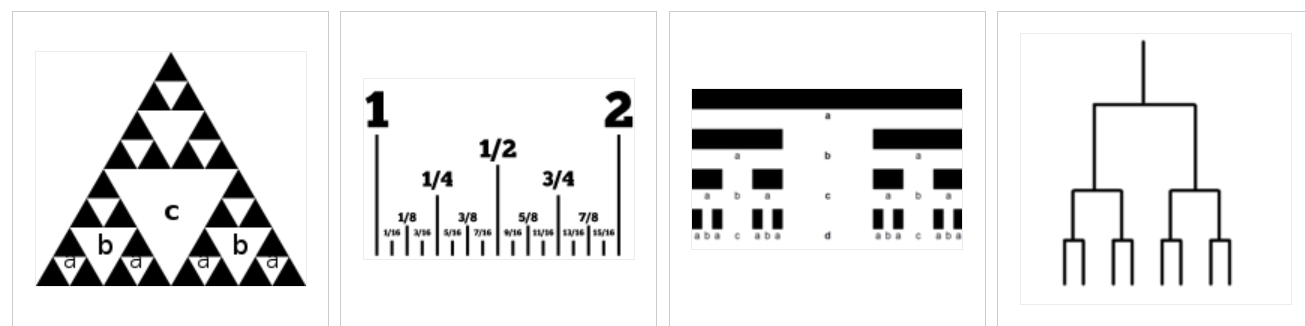

Binary counter:

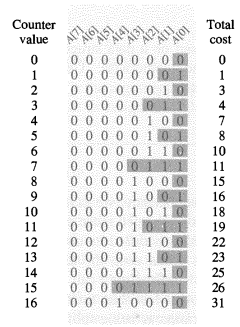

In [ ]:
#@title ABACABA pattern
%%html

<svg width="145.17mm" height="99.74mm" version="1.1" viewBox="0 0 340.02 181.34" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-22" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-22-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(140.62 45.513)">
  <g transform="matrix(1.3106,0,0,1.3106,70.399,202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21,-128.12)"></g>
  </g>
  <text x="-133.27203" y="-55.659447" style="fill-opacity:.47164;fill:#000000;font-family:'Courier New';font-size:24.788px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.61969;word-spacing:0px" xml:space="preserve"><tspan x="-133.27203" y="-55.659447" style="fill-opacity:.47164;fill:#000000;stroke-width:.61969">A</tspan></text>
  <rect x="-137.91" y="-17.777" width="23.829" height="21.889" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.55772;stroke:#6a6a6a"/>
  <text x="-132.61739" y="0.25883433" style="fill-opacity:.47164;fill:#000000;font-family:'Courier New';font-size:24.788px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.61969;word-spacing:0px" xml:space="preserve"><tspan x="-132.61739" y="0.25883433" style="fill-opacity:.47164;fill:#000000;stroke-width:.61969">A B A</tspan></text>
  <path d="m-125.07-20.732c13.57-17.1 43.095-15.44 57.91 0.55416" style="fill:none;marker-end:url(#Arrow1Mend);stroke-width:.43378;stroke:#000000"/>
  <rect x="-77.762" y="-17.826" width="23.829" height="21.889" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.55772;stroke:#6a6a6a"/>
  <rect x="-139.78" y="64.919" width="51.466" height="21.621" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.55772;stroke:#6a6a6a"/>
  <text x="-136.08943" y="82.820816" style="fill-opacity:.47164;fill:#000000;font-family:'Courier New';font-size:24.788px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.61969;word-spacing:0px" xml:space="preserve"><tspan x="-136.08943" y="82.820816" style="fill-opacity:.47164;fill:#000000;stroke-width:.61969">A B C</tspan></text>
  <path d="m-128.47 61.782c13.551-25.777 82.141-24.668 96.935-0.55692" style="fill:none;marker-end:url(#Arrow1Mend-22);stroke-width:.47035;stroke:#000000"/>
  <rect x="-55.458" y="63.495" width="51.466" height="21.621" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.55772;stroke:#6a6a6a"/>
  <text x="-51.768501" y="81.39624" style="fill-opacity:.47164;fill:#000000;font-family:'Courier New';font-size:24.788px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.61969;word-spacing:0px" xml:space="preserve"><tspan x="-51.768501" y="81.39624" style="fill-opacity:.47164;fill:#000000;stroke-width:.61969">A B </tspan></text>
  <rect x="-140.34" y="140.41" width="138.11" height="21.272" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.55772;stroke:#6a6a6a"/>
  <text x="-136.62683" y="158.47974" style="fill-opacity:.47164;fill:#000000;font-family:'Courier New';font-size:24.788px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.61969;word-spacing:0px" xml:space="preserve"><tspan x="-136.62683" y="158.47974" style="fill-opacity:.47164;fill:#000000;stroke-width:.61969">A B C</tspan></text>
  <path d="m-127.16 138.27c32.621-42.235 205.44-46.089 233.04-1.8631" style="fill:none;marker-end:url(#Arrow1Mend-22-0);stroke-width:.47035;stroke:#000000"/>
  <text x="-50.45871" y="157.8864" style="fill-opacity:.47164;fill:#000000;font-family:'Courier New';font-size:24.788px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.61969;word-spacing:0px" xml:space="preserve"><tspan x="-50.45871" y="157.8864" style="fill-opacity:.47164;fill:#000000;stroke-width:.61969">A B D </tspan></text>
  <text x="34.900009" y="158.19337" style="fill-opacity:.47164;fill:#000000;font-family:'Courier New';font-size:24.788px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.61969;word-spacing:0px" xml:space="preserve"><tspan x="34.900009" y="158.19337" style="fill-opacity:.47164;fill:#000000;stroke-width:.61969">A B C</tspan></text>
  <text x="120.91894" y="157.94435" style="fill-opacity:.47164;fill:#000000;font-family:'Courier New';font-size:24.788px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.61969;word-spacing:0px" xml:space="preserve"><tspan x="120.91894" y="157.94435" style="fill-opacity:.47164;fill:#000000;stroke-width:.61969">A B D </tspan></text>
  <rect x="28.865" y="140.36" width="170.25" height="21.212" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.56481;stroke:#6a6a6a"/>
 </g>
</svg>


It's ideal because on each level you do a sequence of binary searches: reduce the length of the "segment" you search in by half. It's natural that the height of such "tree" $L_{ideal}(n)$ is logarithmic:

$$
L_{ideal}(n) \approx \log_2{n}.
$$

Ideal structure is "rigid". It's har to insert/delete new node without disturbing the whole structure.

In [ ]:
#@title Main step in find/insert/delete
%%html

<svg width="140mm" height="70mm" version="1.1" viewBox="0 0 169.81 75.046" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns19="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-14.951 -13.465)">
  <rect x="15.935" y="63.074" width="44.504" height="23.821" ry="2.5036" style="fill:#bababa;opacity:.999"/>
  <path d="m104.5 13.465-46.068 15.158 46.077 15.318 45.759-15.276z" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m58.437 28.623h-22.858l0.24434 33.997" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m150.27 28.665h22.858l0.0668 27.903" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <rect x="14.951" y="62.841" width="44.375" height="23.243" ry="2.4429" style="fill:#f7d417;opacity:.999"/>
  <rect x="15.708" y="63.575" width="42.643" height="21.731" ry="2.284" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48663;stroke:#000000"/>
  <path d="m41.177 77.312c-0.0117-0.09366-0.52861-1.3564-0.55487-1.6521-0.01567-0.17647 5e-5 -0.50515 0.26845-0.65409 0.42539-0.23605 0.6972-9e-3 0.92763 0.09697 0.21929 0.10082 5.4791 3.7533 5.4791 3.7533s-5.7281 3.9819-5.7749 3.9819c-0.04682 0-0.20412 0.07269-0.47416-0.01167-0.50035-0.21595-0.40907-0.72168-0.24586-1.2235 0.05853-0.18732 0.40977-1.2 0.40977-1.2l-11.914-0.0078-0.01655-3.1128 11.895 0.02976z" style="fill:#000000;stroke-width:.092721px;stroke:#000000"/>
  <text x="26.893414" y="71.259964" style="font-family:'Courier New';font-size:6.7097px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16774;word-spacing:0px" xml:space="preserve"><tspan x="26.893414" y="71.259964" style="stroke-width:.16774">RIGHT</tspan></text>
  <rect x="162.9" y="56.778" width="21.864" height="31.733" ry="3.3352" style="fill:#bababa;opacity:.999"/>
  <rect x="161.92" y="56.707" width="22.371" height="31.306" ry="3.3166" style="fill:#f7d417;opacity:.999"/>
  <rect x="162.7" y="57.523" width="20.815" height="29.724" ry="3.1575" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.39721;stroke:#000000"/>
  <path d="m175.2 78.679c0.0937-0.01165 1.3564-0.52862 1.6521-0.55487 0.17648-0.01564 0.50516 5e-5 0.6541 0.26845 0.23605 0.42538 9e-3 0.6972-0.097 0.92763-0.10083 0.21929-3.7534 5.4791-3.7534 5.4791s-3.9819-5.7281-3.9819-5.7749c0-0.04685-0.0727-0.20411 0.0117-0.47416 0.21595-0.50036 0.72169-0.40908 1.2235-0.24586 0.18732 0.0585 1.2 0.40977 1.2 0.40977l7e-3 -11.914 3.1128-0.01656-0.0298 11.895z" style="fill:#000000;stroke-width:.092721px;stroke:#000000"/>
  <text x="166.22025" y="64.19561" style="font-family:'Courier New';font-size:5.7609px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14402;word-spacing:0px" xml:space="preserve"><tspan x="166.22025" y="64.19561" style="stroke-width:.14402">DOWN</tspan></text>
  <text x="76.643456" y="15.638845" style="font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="76.643456" y="15.638845" style="stroke-width:.26458"/></text>
  <g transform="matrix(.67461 0 0 .67461 79.212 25.292)" ns19:alignment="middle center" ns19:inkscapeversion="1.0" ns19:jacobian_sqrt="1.0" ns19:pdfconverter="inkscape" ns19:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns19:scale="2.834645669291339" ns19:texconverter="pdflatex" ns19:text="$val  &lt; right\\_neighbour$" ns19:version="1.1.0">
   <defs id="id-4a4e917d-cc9f-424b-943e-46cacb4c3f6c"></defs>
   <g transform="translate(-149.01 -127.84)">
    <g id="id-cb823dcb-9a65-483a-a8e1-9a421cd96f9f" transform="matrix(1.0407 0 0 1.0407 -18.224 -4.3634)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
     </g>
    </g>
    <g transform="matrix(1.0407 0 0 1.0407 -18.224 -4.3634)" style="fill:#000000">
     <g transform="translate(153.9 134.76)">
      <path id="id-cd2016fb-1c7e-402f-ba59-df0686bf4fca" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(159.17 134.76)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(1.0407 0 0 1.0407 -18.224 -4.3634)" style="fill:#000000">
     <g transform="translate(165.1 134.76)">
      <path id="id-642a7151-7571-4559-8652-331e93c222ba" d="m6.7344-4.9688c0.10938-0.0625 0.1875-0.10938 0.1875-0.21875s-0.09375-0.20312-0.20312-0.20312c-0.03125 0-0.046875 0-0.17188 0.078125l-5.5312 2.5938c-0.10938 0.0625-0.1875 0.10938-0.1875 0.21875 0 0.125 0.078125 0.17188 0.1875 0.23438l5.5312 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312s-0.078125-0.15625-0.1875-0.21875l-5.2344-2.4844z"/>
     </g>
    </g>
    <g transform="matrix(1.0407 0 0 1.0407 -18.224 -4.3634)" style="fill:#000000">
     <g transform="translate(175.62 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c7479466-56be-497f-9a43-45747cfd4e4e" transform="matrix(1.0407 0 0 1.0407 -18.224 -4.3634)" style="fill:#000000">
     <g transform="translate(180.39 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(183.82 134.76)">
      <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(1.0407 0 0 1.0407 -18.224 -4.3634)" style="fill:#000000">
     <g transform="translate(188.93 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
     </g>
     <g transform="translate(194.67 134.76)">
      <path id="id-da4cd564-256e-4815-8820-77402f278f5f" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
    </g>
    <g id="id-0275c764-a395-432e-be9c-603969abe2ee" style="fill:#000000">
     <g transform="translate(198.27 134.76)"></g>
    </g>
    <g transform="matrix(1.0407 0 0 1.0407 -23.122 -4.3634)" style="fill:#000000">
     <g transform="translate(206.02 134.76)">
      <path id="id-3af64f9c-42bc-415e-960c-caf2c954f1bd" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(212 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(216.63 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(220.06 134.76)">
      <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(1.0407 0 0 1.0407 -23.122 -4.3634)" style="fill:#000000">
     <g transform="translate(225.18 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
     </g>
     <g transform="translate(230.92 134.76)">
      <path id="id-741b046d-a5a2-4191-8e5a-e81935df44aa" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
     </g>
     <g transform="translate(235.19 134.76)">
      <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
     </g>
     <g transform="translate(240.02 134.76)">
      <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
     </g>
     <g transform="translate(245.72 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <path d="m187.08 136.67c0.18039-0.0258 4.4581 0 4.4581 0" style="fill:none;stroke-width:.40817px;stroke:#000000"/>
   </g>
  </g>
  <text x="44.983707" y="26.872883" style="fill:#00c700;font-family:'Courier New';font-size:6.6461px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16615;word-spacing:0px" xml:space="preserve"><tspan x="44.983707" y="26.872883" style="fill:#00c700;stroke-width:.16615">Y</tspan></text>
  <text x="160.3298" y="27.319769" style="fill-opacity:.69851;fill:#ff1b00;font-family:'Courier New';font-size:6.6461px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16615;word-spacing:0px" xml:space="preserve"><tspan x="160.3298" y="27.319769" style="fill-opacity:.69851;fill:#ff1b00;stroke-width:.16615">N</tspan></text>
 </g>
</svg>




# Operations: Find/insert/delete

In [ ]:
#@title ###Find
%%html
<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">

</font><br>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21 -128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="44.52" y="-61.779" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="-60.954765" y="-44.753624" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="-60.954765" y="-44.753624" style="fill:#ff0000;stroke-width:.52917">7</tspan></text>
 </g>
</svg>

</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
➱
</font><br><?xml version="1.0" encoding="UTF-8"?>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21 -128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-255.52" y="-61.779" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="239.08133" y="-44.753624" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="239.08133" y="-44.753624" style="fill:#ff0000;stroke-width:.52917">7</tspan></text>
 </g>
</svg>
</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
⇩
</font><br>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21 -128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-255.52" y="-35.85" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="239.08133" y="-18.824432" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="239.08133" y="-18.824432" style="fill:#ff0000;stroke-width:.52917">7</tspan></text>
 </g>
</svg>
</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
⇩
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21 -128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-255.52" y="-10.45" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="239.08133" y="6.575563" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="239.08133" y="6.575563" style="fill:#ff0000;stroke-width:.52917">7</tspan></text>
 </g>
</svg>
</div>

<div id="slide_4" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
⇩
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21 -128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-255.52" y="14.95" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="239.08133" y="31.975571" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="239.08133" y="31.975571" style="fill:#ff0000;stroke-width:.52917">7</tspan></text>
 </g>
</svg>

</div>

<div id="slide_5" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
➱
</font><br>

<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21 -128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="15.029" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="334.02084" y="32.054371" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.02084" y="32.054371" style="fill:#ff0000;stroke-width:.52917">7</tspan></text>
 </g>
</svg>
</div>

<div id="slide_6" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
🛑
</font><br>

<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker1451" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21 -128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="15.029" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="334.02084" y="32.054371" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.02084" y="32.054371" style="fill:#ff0000;stroke-width:.52917">7</tspan></text>
  <path d="m-93.953-48.735 305.07-0.11708 0.33042 77.033h109.52" style="fill:none;marker-end:url(#marker1451);stroke-width:1.8521;stroke:#ff0000"/>
 </g>
</svg>
</div>


<div style="position:absolute; top:50px; left:20mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>



<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_0", "slide_1", "slide_2", "slide_3", "slide_4", "slide_5", "slide_6"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
#@title ###Insertion
%%html
<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">

</font><br><?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
 </g>
</svg>

</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
➱
</font><br><?xml version="1.0" encoding="UTF-8"?>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="44.52" y="-61.779" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="-60.954765" y="-44.753624" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="-60.954765" y="-44.753624" style="fill:#ff0000;stroke-width:.52917">8</tspan></text>
 </g>
</svg>
</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
⇩
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-255.52" y="-61.779" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="239.08133" y="-44.753624" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="239.08133" y="-44.753624" style="fill:#ff0000;stroke-width:.52917">8</tspan></text>
 </g>
</svg>
</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
⇩
</font><br>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-255.52" y="-35.849" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="239.08133" y="-18.824432" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="239.08133" y="-18.824432" style="fill:#ff0000;stroke-width:.52917">8</tspan></text>
 </g>
</svg>

</div>

<div id="slide_4" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
⇩
</font><br>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-255.52" y="-9.9202" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="239.08133" y="7.1047297" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="239.08133" y="7.1047297" style="fill:#ff0000;stroke-width:.52917">8</tspan></text>
 </g>
</svg>
</div>

<div id="slide_5" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
➱
</font><br>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-255.52" y="15.48" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="239.08133" y="32.504738" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="239.08133" y="32.504738" style="fill:#ff0000;stroke-width:.52917">8</tspan></text>
 </g>
</svg>
</div>

<div id="slide_6" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
🛑
</font><br>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-408.45" y="14.951" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="392.01236" y="31.975571" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="392.01236" y="31.975571" style="fill:#ff0000;stroke-width:.52917">8</tspan></text>
 </g>
</svg>
</div>

<div id="slide_7" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Create node
</font><br>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-87.332" width="25.658" height="128.19" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.72456;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill-opacity:.08;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-87.688" width="25.658" height="127.75" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.72005;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-425.91" y="-87.681" width="25.658" height="128.29" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#ff3b00"/>
  <text x="409.47513" y="-15.120267" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="409.47513" y="-15.120267" style="fill:#ff0000;stroke-width:.52917">8</tspan></text>
  <rect transform="scale(-1,1)" x="-451.57" y="14.951" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-10.707" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-36.365" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-62.023" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-87.681" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="81.29" y="-87.436" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#ff3b00"/>
 </g>
</svg>
</div>

<div id="slide_8" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Fix arrows
</font><br>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-7-9-5-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-7-9-5-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-7-9-5-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0-90" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-7-9-6" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-7-9-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-88" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-7-9-7-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-88-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-7-9-7-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-88-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-87.332" width="25.658" height="128.19" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.72456;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill-opacity:.1;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.37-22.62 187.16 0.09449" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#ff0000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.35-48.596h185.57" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#ff0000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill-opacity:.08;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-87.688" width="25.658" height="127.75" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.72005;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-425.91" y="-87.681" width="25.658" height="128.29" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#ff3b00"/>
  <text x="409.47513" y="-15.120267" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="409.47513" y="-15.120267" style="fill:#ff0000;stroke-width:.52917">8</tspan></text>
  <rect transform="scale(-1,1)" x="-451.57" y="14.951" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-10.707" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-36.365" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-62.023" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-87.681" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#ff3b00"/>
  <rect transform="scale(-1,1)" x="81.29" y="-87.436" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#ff3b00"/>
  <path d="m-93.977-74.593 492.03 0.02362" style="fill:none;marker-end:url(#Arrow1Mend-0-08-2);marker-start:url(#DotM-7-89-2);stroke-width:.52917;stroke:#ff0000"/>
  <path d="m438.78-49.135 193.12 0.06682" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0-8);marker-start:url(#DotM-7-9-5-3);stroke-width:.52917;stroke:#ff0000"/>
  <path d="m438.71-74.927h192.92" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0-6);marker-start:url(#DotM-7-9-5-7);stroke-width:.52917;stroke:#ff0000"/>
  <path d="m438.78-23.544 193.19-0.33409" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0-90);marker-start:url(#DotM-7-9-5-8);stroke-width:.52917;stroke:#ff0000"/>
  <path d="m211.45 2.5535h186.64" style="fill:none;marker-end:url(#Arrow1Mend-0-3-7);marker-start:url(#DotM-7-9-6);stroke-width:.52917;stroke:#ff0000"/>
  <path d="m438.76 27.722 39.872-0.05011" style="fill:none;marker-end:url(#Arrow1Mend-0-3-88);marker-start:url(#DotM-7-9-7);stroke-width:.52917;stroke:#ff0000"/>
  <path d="m438.73 2.1646h39.719" style="fill:none;marker-end:url(#Arrow1Mend-0-3-88-0);marker-start:url(#DotM-7-9-7-7);stroke-width:.52917;stroke:#ff0000"/>
  <path d="m363.44 27.195 35.006-0.23909" style="fill:none;marker-end:url(#Arrow1Mend-0-3-88-8);marker-start:url(#DotM-7-9-7-0);stroke-width:.52917;stroke:#ff0000"/>
 </g>
</svg>
</div>

<div id="slide_9" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Insert complete
</font><br>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0-90" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-6" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-88" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-7-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-88-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-7-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-88-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-87.332" width="25.658" height="128.19" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.72456;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.37-22.62 187.16 0.09449" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.35-48.596h185.57" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-87.688" width="25.658" height="127.75" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.72005;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-425.91" y="-87.681" width="25.658" height="128.29" style="fill-opacity:.33;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#aeaeae"/>
  <text x="409.47513" y="-15.120267" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="409.47513" y="-15.120267" style="fill:#787878;stroke-width:.52917">8</tspan></text>
  <rect transform="scale(-1,1)" x="-451.57" y="14.951" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-10.707" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-36.365" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-62.023" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-451.57" y="-87.681" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-87.436" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#aeaeae"/>
  <path d="m-93.977-74.593 492.03 0.02362" style="fill:none;marker-end:url(#Arrow1Mend-0-08-2);marker-start:url(#DotM-7-89-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m438.78-49.135 193.12 0.06682" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0-8);marker-start:url(#DotM-7-9-5-3);stroke-width:.52917;stroke:#000000"/>
  <path d="m438.71-74.927h192.92" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0-6);marker-start:url(#DotM-7-9-5-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m438.78-23.544 193.19-0.33409" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0-90);marker-start:url(#DotM-7-9-5-8);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 2.5535h186.64" style="fill:none;marker-end:url(#Arrow1Mend-0-3-7);marker-start:url(#DotM-7-9-6);stroke-width:.52917;stroke:#000000"/>
  <path d="m438.76 27.722 39.872-0.05011" style="fill:none;marker-end:url(#Arrow1Mend-0-3-88);marker-start:url(#DotM-7-9-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m438.73 2.1646h39.719" style="fill:none;marker-end:url(#Arrow1Mend-0-3-88-0);marker-start:url(#DotM-7-9-7-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m363.44 27.195 35.006-0.23909" style="fill:none;marker-end:url(#Arrow1Mend-0-3-88-8);marker-start:url(#DotM-7-9-7-0);stroke-width:.52917;stroke:#000000"/>
 </g>
</svg>
</div>

<div id="slide_10" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Beautification
</font><br>

<svg width="445mm" height="130mm" version="1.1" viewBox="0 0 1043.2 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5-3-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0-8-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5-8-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0-90-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-30" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-20" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-6" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="1043.2" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <defs id="id-12c28413-410c-4273-8cfd-f8de216fdc2a"></defs>
   <g transform="translate(-149.21 -128.12)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-87.332" width="25.658" height="128.19" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.72456;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-890.53" y="-87.146" width="25.658" height="127.75" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.72005;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-736.54" y="-10.989" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="716.13165" y="19.236668" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="716.13165" y="19.236668" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-762.19" y="14.951" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-762.19" y="-10.707" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m749.87 27.679h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m749.89 2.1212h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-502.64" y="-87.681" width="25.658" height="128.29" style="fill-opacity:.33;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#aeaeae"/>
  <text x="486.20547" y="-15.120267" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="486.20547" y="-15.120267" style="fill:#787878;stroke-width:.52917">8</tspan></text>
  <rect transform="scale(-1,1)" x="-528.3" y="14.951" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-528.3" y="-10.707" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-528.3" y="-36.365" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-528.3" y="-62.023" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-528.3" y="-87.681" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-87.436" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.794;stroke:#aeaeae"/>
  <path d="m-93.965-74.59 569.24 0.02087" style="fill:none;marker-end:url(#Arrow1Mend-0-08-2);marker-start:url(#DotM-7-89-2);stroke-width:.529;stroke:#000000"/>
  <path d="m363.44 27.195h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0-1);marker-start:url(#DotM-4-2-3);stroke-width:.52917;stroke:#000000"/>
  <path d="m515.46 2.1646 193.12 0.0668" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0-8-5);marker-start:url(#DotM-7-9-5-3-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m515.46 27.756 193.19-0.33409" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0-90-4);marker-start:url(#DotM-7-9-5-8-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.35-48.596h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08-3);marker-start:url(#DotM-7-89-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.37-22.62h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08-30);marker-start:url(#DotM-7-89-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 2.5535h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08-6);marker-start:url(#DotM-7-89-0);stroke-width:.52917;stroke:#000000"/>
  <path d="m515.46-23.765h347.89" style="fill:none;marker-end:url(#Arrow1Mend-0-08-20);marker-start:url(#DotM-7-89-4);stroke-width:.53;stroke:#000000"/>
  <path d="m515.38-74.79h347.89" style="fill:none;marker-end:url(#Arrow1Mend-0-08-5);marker-start:url(#DotM-7-89-6);stroke-width:.53;stroke:#000000"/>
  <path d="m515.46-49.178h347.89" style="fill:none;marker-end:url(#Arrow1Mend-0-08-7);marker-start:url(#DotM-7-89-9);stroke-width:.53;stroke:#000000"/>
 </g>
</svg>
</div>

<div style="position:absolute; top:50px; left:20mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>



<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_0", "slide_1", "slide_2", "slide_3", "slide_4", "slide_5", "slide_6", "slide_7", "slide_8", "slide_9", "slide_10"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
#@title ###Deletion
%%html
<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">

</font><br>

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0"></g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="44.52" y="-61.779" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="-65.069191" y="-44.818932" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="-65.069191" y="-44.818932" style="fill:#ff0000;stroke-width:.52917">10</tspan></text>
 </g>
</svg>

</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
➱
</font><br>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0"></g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-256.05" y="-61.779" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="235.49609" y="-44.818932" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="235.49609" y="-44.818932" style="fill:#ff0000;stroke-width:.52917">10</tspan></text>
 </g>
</svg>

</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
⇩
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0"></g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-256.05" y="-35.321" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="235.49609" y="-18.360573" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="235.49609" y="-18.360573" style="fill:#ff0000;stroke-width:.52917">10</tspan></text>
 </g>
</svg>
</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
⇩
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0"></g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-256.05" y="-9.9206" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="235.49609" y="7.039423" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="235.49609" y="7.039423" style="fill:#ff0000;stroke-width:.52917">10</tspan></text>
 </g>
</svg>
</div>

<div id="slide_4" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
⇩
</font><br>

<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0"></g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m212.14 2.5967h418.44" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-256.05" y="15.479" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="235.49609" y="32.43943" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="235.49609" y="32.43943" style="fill:#ff0000;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="14.408" width="25.658" height="25.658" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.78296;stroke:#aeaeae"/>
  <text x="485.10034" y="31.103001" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="485.10034" y="31.103001" style="fill:#787878;stroke-width:.52917">10</tspan></text>
 </g>
</svg>
</div>

<div id="slide_5" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
➱
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0"></g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m212.14 2.5967h418.44" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-407.92" y="15.479" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="387.36868" y="32.43943" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="387.36868" y="32.43943" style="fill:#ff0000;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="14.408" width="25.658" height="25.658" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.78296;stroke:#aeaeae"/>
  <text x="485.10034" y="31.103001" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="485.10034" y="31.103001" style="fill:#787878;stroke-width:.52917">10</tspan></text>
 </g>
</svg>
</div>

<div id="slide_6" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
🛑
</font><br>

<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0"></g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m212.14 2.5967h418.44" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m365.03 27.772h265.22" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-407.92" y="15.479" width="25.658" height="25.658" style="fill-opacity:.62388;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#ff3b00"/>
  <text x="387.36868" y="32.43943" style="fill:#ff0000;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="387.36868" y="32.43943" style="fill:#ff0000;stroke-width:.52917">10</tspan></text>
 </g>
</svg>
</div>

<div id="slide_7" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Create node
</font><br>

<?xml version="1.0" encoding="UTF-8"?>
<svg width="280mm" height="100mm" version="1.1" viewBox="0 0 654.13 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42,127.24)">
  <rect x="-142.42" y="-127.24" width="654.13" height="181.81" style="fill:#ffffff;opacity:.999;stroke-width:.89329"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106,0,0,1.3106,70.399,202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0"></g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.99 2.5967h265.17" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.77-23.017h265.94" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h265.83" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-504.45" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <path d="m365.03 27.772h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0-4);marker-start:url(#DotM-4-2-7);stroke-width:.52917;stroke:#000000"/>
 </g>
</svg>
</div>

<div style="position:absolute; top:50px; left:20mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>



<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_0", "slide_1", "slide_2", "slide_3", "slide_4", "slide_5", "slide_6", "slide_7"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

# Performance

It's convenient to express all performance and space related characteristics of the datastructure in terms of standard probability distributions: **Binomial** and **Negative Binomial**. This is done to reuse calculations for expected values and variations of these distributions. Binomial distribution is expressed via **Bernoulli distribution**, Negative Binomial distribution is expressed in terms of **Geometric distribution**. So I'll review all four distributions.

# Math note: Bernoulli, Geometric, Binomial, Negative Binomial distributions




**Random variables and probability distributions**

Consider a random variable $X$ that has support $S_X=\{0,1,2,\cdots\}$ and probability distribution $f_X(k)$.

We can form a new random variable $Y=a+X$ where $a$ is constant number.
Note that support of $Y$ is $S_Y=\{a,a+1,a+2,\cdots\}$ (support $S_X$ is shifted by $a$) with probability distribution $f_Y(k)=f_X(k-a)$ (pdf $f_X$ is shifted right by $a$).

You can also:
* add/substract constant from random variable;
* multiply random variable by a constant;
* add random variables.

Addition of random variables $\neq$ probability distributions.



**Bernoulli distribution**

Bernoulli distributed random variable is $0$ (failure) with probability $1-p$ and $1$ (success) with probability $p$.

$$
\begin{aligned}
P(X=0)&=1-p,\\
P(X=1)&=p.
\end{aligned}
$$

Expected value:

$$
\mathbb{E}(X\sim \text{Bern}) = 0\cdot(1-p)+1\cdot p = p.
$$





**Geometric distibution**

The **geometric distribution** gives the number of failures in a series Bernoulli trials before the first $0$ (failure).

$$
P(X=s) = (1-p)^sp,
$$

where $s=\boxed{0},1,2 \cdots$.

Expected value:
$$
\mathbb{E}(X\sim \text{Geom}) = \frac{1-p}{p}.
$$

Don't confuse with the **First Success distribution** that gives the number of trials ($1$+number of failures) in a series Bernoulli trials before the first $0$ (failure).

$$
P(X=s) = (1-p)^{s-1}p,
$$

where $s=\boxed{1},2 \cdots$.

Clearly

$$
\text{Geom} = 1+\text{FS}.
$$

and

$$
\mathbb{E}(X\sim \text{FS})=\frac{1}{p}.
$$

First Success distribution has a very handy property:

$$
\text{Pr}(X>i) = (1-p)^i.
$$

Binomial and Negative Binomial distributions  (along with hypergeometric and negative hypergeometric) naturally occur in the urn model set up.

Urn model:

| | With replacements | No replacements |
|---|---|---|
| **Given number of draws** | binomial distribution | hypergeometric distribution
| **Given number of failures** | negative binomial distribution | negative hypergeometric distribution





**Binomial distribution**

The binomial distribution $B(n,p)$ gives the probability of getting exactly $k$ successes in $n$ independent Bernoulli trials:

$$
\text{Pr}(X=k)={n \choose k } p^k (1-p)^{n-k},
$$

where $k=0,1,2,3\cdots $.

Let $X \sim B(n,p)$. We can write

$$
X = X_1 + \cdots + X_n
$$

where the $X_i$ are i.i.d. $\text{Bern}(p)$.

That's why (by linearity of the expected value) the expected value:

$$
\mathbb{E}(X \sim B)=\mathbb{E}(X_1) + \cdots + \mathbb{E}(X_n)=n\cdot \mathbb{E}(X_1) = np
$$

**Negative binomial distribution**

The negative binomial distribution $\text{NB}(s,p)$ gives the probability that the $s$ successes will happen after $k$ independent Bernoulli trials. If the probability on each trial is $p$:

$$
\text{Pr}(X=k) = {k+s-1 \choose k} (1-p)^{k-s}p^s = (-1)^k {-k \choose s} (1-p)^{k-s}p^s
$$

where $k=0,1,2,3\cdots $.

Note that
$$
\begin{aligned}
\text{Geom}(p) &= \text{NB}(1,p),\\
\text{FS}(p) &= 1+\text{NB}(1,p).
\end{aligned}
$$
Let $X \sim \text{NB}(s,p)$. We can write

$$
X = X_1 + \cdots + X_s
$$

where the $X_i$ are i.i.d. $\text{Geom}(p)$.

That's why (by linearity of the expected value) the expected value:

$$
\mathbb{E}(X\sim NB) = s \cdot \mathbb{E}(X\sim\text{Geom}) = s \cdot \frac{1-p}{p}
$$



# Time/space

## Space (auxiliary space occupied by pointers)

Expected space:

$$
\boxed{\mathbb{E}(space) = \frac{n}{1-p}}
$$

If $p=1/2$ (popular choice) every node on average needs 2 pointers per node. Note that regular BST also requires 2 pointers per node in a binary tree.

## Proof

Note that by construction level of each node is a random variable:

$$
\text{level of the node} = 1+\text{NB}(1,1-p) = \text{FS}(1,1-p).
$$


Expected space for $n$ nodes:

$$
\mathbb{E}(space)= n \cdot \mathbb{E}\left(1+\text{NB}(1,1-p)\right) = n \cdot \mathbb{E}(X \sim \text{FS})=n\cdot \left( 1+\frac{p}{1-p} \right)= \frac{n}{1-p}.
$$

You can derive this formula directly of course:
$$
\mathbb{E}(space)=n\sum_{i=1}^\infty i \cdot p^{i-1}(1-p)= -n\cdot (1-p)\cdot \left(\frac{1}{1-p}\right)^{'}=n \cdot \frac{1-p}{(1-p)^2}=\frac{n}{1-p}.
$$

$$
\mathbb{V}(space)=n \frac{1-p}{p^2}
$$

## Time (number of operations performed to find a node)

Expected search time:
$$
\boxed{\mathbb{E}(time) < \frac{1}{p} L(n)+\frac{1}{1-p} \approx \frac{1}{p} \log_{1/p}n}
$$
where $\boxed{L(n) = \log_{1/p}n}$.

$$
\mathbb{V}(time) < \frac{(L(n)-1)(1-p)}{p^2}+\frac{1-1/np}{p}+\frac{p}{(1-p)^2}.
$$

## Proof

In [ ]:
#@title Why $L(n)$ is special?
%%html

<svg width="187.16mm" height="126.85mm" version="1.1" viewBox="0 0 557.12 333.92" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker2383" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker2383-16" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-2-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-2-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-2-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-2-6" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-85" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-2-7-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-2-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-2-7-91" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-2-73" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-4-82" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-2-7-35" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotM-2-7-35-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <path d="m50.189 322.07v-322.29" style="fill:none;marker-end:url(#marker2383);stroke-opacity:.42687;stroke-width:.94511;stroke:#000000"/>
 <path d="m50.189 322.07h496.66" style="fill:none;marker-end:url(#marker2383-16);stroke-opacity:.42687;stroke-width:1.1732;stroke:#000000"/>
 <path d="m50.189 50.764c76.782 193.52 231.22 238.4 490.44 253.08" style="fill:none;stroke-opacity:.47164;stroke-width:.78759px;stroke:#00b5ff"/>
 <g transform="matrix(2.1554 0 0 2.1554 72.849 49.452)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$p^k (1-p)$" ns20:version="1.1.0">
  <g transform="translate(-148.4 -126.31)">
   <g transform="matrix(.79272 0 0 .79272 30.761 28.453)" style="fill:#000000">
    <g transform="translate(148.71 134.76)">
     <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
    </g>
   </g>
   <g id="id-140a38af-dec5-41e7-8ce5-9dfb2f97c70a" transform="matrix(.79272 0 0 .79272 30.761 28.453)" style="fill:#000000">
    <g transform="translate(153.72 131.15)">
     <path d="m2.1875-4.625c0-0.015625 0.015625-0.10938 0.015625-0.10938 0-0.046875-0.015625-0.10938-0.10938-0.10938-0.14062 0-0.71875 0.0625-0.89062 0.078125-0.046875 0-0.15625 0.015625-0.15625 0.15625 0 0.09375 0.10938 0.09375 0.1875 0.09375 0.32812 0 0.32812 0.0625 0.32812 0.10938s-0.015625 0.09375-0.015625 0.15625l-0.98438 3.9375c-0.046875 0.125-0.046875 0.14062-0.046875 0.15625 0 0.10938 0.09375 0.21875 0.25 0.21875 0.1875 0 0.26562-0.125 0.3125-0.28125 0.015625-0.03125 0.3125-1.2656 0.34375-1.3594 0.5 0.046875 0.89062 0.21875 0.89062 0.57812 0 0.03125 0 0.0625-0.015625 0.14062-0.03125 0.09375-0.03125 0.14062-0.03125 0.21875 0 0.48438 0.40625 0.70312 0.75 0.70312 0.67188 0 0.875-1.0469 0.875-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.10938 0.046875-0.14062 0.17188-0.078125 0.29688-0.26562 0.79688-0.60938 0.79688-0.1875 0-0.25-0.17188-0.25-0.35938 0-0.125 0-0.14062 0.046875-0.3125 0.015625-0.03125 0.03125-0.14062 0.03125-0.21875 0-0.625-0.82812-0.71875-1.125-0.73438 0.20312-0.125 0.45312-0.35938 0.57812-0.46875 0.35938-0.32812 0.70312-0.65625 1.0938-0.65625 0.078125 0 0.17188 0.015625 0.23438 0.09375-0.29688 0.046875-0.35938 0.28125-0.35938 0.39062 0 0.14062 0.10938 0.25 0.26562 0.25 0.20312 0 0.40625-0.15625 0.40625-0.4375 0-0.23438-0.17188-0.5-0.53125-0.5-0.40625 0-0.76562 0.29688-1.125 0.625-0.29688 0.26562-0.51562 0.48438-0.8125 0.60938z"/>
    </g>
   </g>
   <g transform="matrix(.79272 0 0 .79272 34.415 28.453)" style="fill:#000000">
    <g transform="translate(161.4 134.76)">
     <path id="id-4e3a0546-bc8d-4188-963a-78fcf3707f4b" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
    <g transform="translate(165.27 134.76)">
     <path id="id-469e36e9-ead5-4f20-9872-94e5e1e796ce" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.68121 0 0 .68121 158.41 131.28)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(1.1518 0 0 1.1518 141.85 294.57)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
   </g>
   <g transform="matrix(.79272 0 0 .79272 34.289 28.453)" style="fill:#000000">
    <g transform="translate(169.7,134.76)">
     <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
    </g>
   </g>
   <g transform="matrix(.79272 0 0 .79272 32.551 28.453)" style="fill:#000000">
    <g transform="translate(179.66,134.76)">
     <path id="id-1781a0c4-46de-4cc9-9772-d01219e3339f" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
    </g>
   </g>
   <g transform="matrix(.79272 0 0 .79272 31.972 28.453)" style="fill:#000000">
    <g transform="translate(184.67,134.76)">
     <path id="id-94d87540-aa7d-4276-850e-0b50a144fedd" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
    </g>
   </g>
   <g transform="matrix(1.814 0 0 1.814 87.049 28.439)" style="fill:#000000">
    <g transform="translate(153.72 131.15)">
     <path d="m2.1875-4.625c0-0.015625 0.015625-0.10938 0.015625-0.10938 0-0.046875-0.015625-0.10938-0.10938-0.10938-0.14062 0-0.71875 0.0625-0.89062 0.078125-0.046875 0-0.15625 0.015625-0.15625 0.15625 0 0.09375 0.10938 0.09375 0.1875 0.09375 0.32812 0 0.32812 0.0625 0.32812 0.10938s-0.015625 0.09375-0.015625 0.15625l-0.98438 3.9375c-0.046875 0.125-0.046875 0.14062-0.046875 0.15625 0 0.10938 0.09375 0.21875 0.25 0.21875 0.1875 0 0.26562-0.125 0.3125-0.28125 0.015625-0.03125 0.3125-1.2656 0.34375-1.3594 0.5 0.046875 0.89062 0.21875 0.89062 0.57812 0 0.03125 0 0.0625-0.015625 0.14062-0.03125 0.09375-0.03125 0.14062-0.03125 0.21875 0 0.48438 0.40625 0.70312 0.75 0.70312 0.67188 0 0.875-1.0469 0.875-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.10938 0.046875-0.14062 0.17188-0.078125 0.29688-0.26562 0.79688-0.60938 0.79688-0.1875 0-0.25-0.17188-0.25-0.35938 0-0.125 0-0.14062 0.046875-0.3125 0.015625-0.03125 0.03125-0.14062 0.03125-0.21875 0-0.625-0.82812-0.71875-1.125-0.73438 0.20312-0.125 0.45312-0.35938 0.57812-0.46875 0.35938-0.32812 0.70312-0.65625 1.0938-0.65625 0.078125 0 0.17188 0.015625 0.23438 0.09375-0.29688 0.046875-0.35938 0.28125-0.35938 0.39062 0 0.14062 0.10938 0.25 0.26562 0.25 0.20312 0 0.40625-0.15625 0.40625-0.4375 0-0.23438-0.17188-0.5-0.53125-0.5-0.40625 0-0.76562 0.29688-1.125 0.625-0.29688 0.26562-0.51562 0.48438-0.8125 0.60938z"/>
    </g>
   </g>
   <g transform="matrix(.54001 0 0 .54001 64.476 59.4)" style="fill:#000000">
    <g transform="translate(169.7,134.76)">
     <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
    </g>
   </g>
   <g transform="matrix(.68379 0 0 .68379 202.28 159.59)" style="fill:#000000">
    <g transform="translate(179.66,134.76)">
     <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
    </g>
   </g>
  </g>
 </g>
 <path d="m74.424 322.38v-221.45" style="fill:none;marker-end:url(#DotM);stroke-width:1.1814;stroke:#000000"/>
 <path d="m102.22 322.07v-175.52" style="fill:none;marker-end:url(#DotM-2);stroke-width:1.1814;stroke:#000000"/>
 <path d="m129.67 321.98v-145.36" style="fill:none;marker-end:url(#DotM-4);stroke-width:1.1814;stroke:#000000"/>
 <path d="m157.47 321.92v-119.49" style="fill:none;marker-end:url(#DotM-2-7);stroke-width:1.1814;stroke:#000000"/>
 <path d="m185.27 321.61v-100.3" style="fill:none;marker-end:url(#DotM-2-1);stroke-width:1.1814;stroke:#000000"/>
 <path d="m212.72 321.52v-83.865" style="fill:none;marker-end:url(#DotM-4-8);stroke-width:1.1814;stroke:#000000"/>
 <path d="m240.52 321.46v-71.158" style="fill:none;marker-end:url(#DotM-2-7-9);stroke-width:1.1814;stroke:#000000"/>
 <path d="m268.32 322.02v-60.988" style="fill:none;marker-end:url(#DotM-2-6);stroke-width:1.1814;stroke:#000000"/>
 <path d="m295.77 322.29v-52.779" style="fill:none;marker-end:url(#DotM-4-85);stroke-width:1.1814;stroke:#000000"/>
 <path d="m323.57 322.08v-45.375" style="fill:none;marker-end:url(#DotM-2-7-3);stroke-width:1.1814;stroke:#000000"/>
 <path d="m351.37 322.01v-39.376" style="fill:none;marker-end:url(#DotM-2-8);stroke-width:1.1814;stroke:#000000"/>
 <path d="m378.82 322.43v-34.772" style="fill:none;marker-end:url(#DotM-4-9);stroke-width:1.1814;stroke:#ff0000"/>
 <path d="m406.09 321.94v-30.064" style="fill:none;marker-end:url(#DotM-2-7-91);stroke-width:1.1814;stroke:#ff0000"/>
 <path d="m434.93 322.15v-27.045" style="fill:none;marker-end:url(#DotM-2-73);stroke-width:1.1814;stroke:#ff0000"/>
 <path d="m461.87 321.82v-23.849" style="fill:none;marker-end:url(#DotM-4-82);stroke-width:1.1814;stroke:#ff0000"/>
 <path d="m489.66 322.44v-21.982" style="fill:none;marker-end:url(#DotM-2-7-35);stroke-width:1.1814;stroke:#ff0000"/>
 <path d="m517.46 321.88v-19.533" style="fill:none;marker-end:url(#DotM-2-7-35-1);stroke-width:1.1814;stroke:#ff0000"/>
 <g transform="matrix(3.7795 0 0 3.7795 291.5 357.03)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$L(n) k probability$" ns20:version="1.1.0">
  <g transform="translate(-149.1 -127.28)">
   <path d="m190.06 111.34-6.6403 6.7285 1.7981-0.0152 6.4534-6.5218c-0.67929-0.0642-1.1327-0.0738-1.6111-0.19148z" style="fill-opacity:.2597;fill:#ff0000"/>
   <g transform="matrix(.60578 0 0 .60578 75.031 43.749)" style="fill:#ff0000">
    <g transform="translate(148.71 134.76)" style="fill:#ff0000">
     <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-1.1562c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z" style="fill:#ff0000"/>
    </g>
   </g>
   <g id="id-d7907a45-b7a2-407f-8679-6e23a4023d4e" transform="matrix(.60578 0 0 .60578 75.031 43.749)" style="fill:#ff0000">
    <g transform="translate(155.49 134.76)" style="fill:#ff0000">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" style="fill:#ff0000"/>
    </g>
   </g>
   <g transform="matrix(.60578 0 0 .60578 75.031 43.749)" style="fill:#ff0000">
    <g transform="translate(159.37 134.76)" style="fill:#ff0000">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill:#ff0000"/>
    </g>
   </g>
   <g id="id-c4fbcea4-cd9e-4542-8db1-b8ce9776517f" transform="matrix(.60578 0 0 .60578 75.031 43.749)" style="fill:#ff0000">
    <g transform="translate(165.35 134.76)" style="fill:#ff0000">
     <path id="id-662bde32-f450-40a1-b2a0-8f407fee61bd" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" style="fill:#ff0000"/>
    </g>
   </g>
   <g transform="matrix(.55432 0 0 .55432 48.511 -3.4317)">
    <g id="id-af6c2ea3-ff39-4b59-93a3-8b832f4ee6ad" transform="translate(-132.07 -72.949)" style="fill:#000000">
     <g transform="translate(174.72 134.76)">
      <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
     </g>
    </g>
    <g id="id-70eeedce-b86c-4f8d-a58e-c76794c6fcba" transform="translate(-132.07 -72.949)" style="fill:#000000">
     <g transform="translate(179.74 134.76)">
      <path id="id-e4df96a4-d8ef-4baf-afae-95931edb06eb" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-902c897e-13ab-4d32-a036-549cef1b3eef" transform="translate(-132.07 -72.949)" style="fill:#000000">
     <g transform="translate(184.5 134.76)">
      <path id="id-8f1fd048-29ee-4f21-a2af-4d74d4d7e40c" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
     </g>
     <g transform="translate(189.33 134.76)">
      <path id="id-4565d544-7539-4e8c-8ab4-f9719432a62c" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
     </g>
     <g transform="translate(193.61 134.76)">
      <path id="id-f1d87cd3-cdc8-4244-a939-98ae3d2d260e" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(198.87 134.76)">
      <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
     </g>
     <g transform="translate(203.15 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(206.58 134.76)">
      <path id="id-a4165db4-7265-4d1a-856c-50c70ade495c" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="translate(-132.07 -72.949)" style="fill:#000000">
     <g transform="translate(209.75 134.76)">
      <path id="id-0233b0de-5f69-4be9-bbee-eddd9d0d64ec" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(213.19 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(216.78 134.76)">
      <path id="id-858f7a25-e867-4ac8-827d-3cfdb642304f" d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
   </g>
   <path d="m174.41 109.36-2.2581 2.2139s-0.0416 1.7071 0.12491 1.6655c0.16655-0.0416 3.7266-3.6329 3.7266-3.6329-0.49026-0.0771-0.99361-0.1558-1.5934-0.24656z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m177.26 109.79-5.1397 5.0563 0.20818 1.7071 6.7257-6.5145c-0.49026-0.0771-1.1944-0.15822-1.7942-0.24898z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m180.45 110.21-7.8763 7.8239 2.1362-0.14772 7.5551-7.4272c-0.49026-0.0771-1.2153-0.15822-1.815-0.24898z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m183.59 110.66-7.1703 7.2437 1.7981-0.0152 6.9907-7.0591c-0.49026-0.0771-1.0629-0.16695-1.6185-0.16938z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m186.65 110.97-6.5956 6.9112 1.8859-0.14772 6.4069-6.5439c-0.49026-0.0771-1.0975-0.12878-1.6972-0.21954z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m193.08 111.66-6.0288 6.3959 1.8859-0.14772 6.0242-6.0581c-0.49026-0.0771-1.2815-0.0993-1.8813-0.19009z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m196.26 111.96-5.5214 5.904s1.4365 0.0208 1.603-0.0208c0.16655-0.0416 5.5378-5.7147 5.5378-5.7147-0.32715-0.0634-1.1035-0.17592-1.6194-0.1685z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m199.29 112.24-5.4832 5.7381 1.832-0.10409 5.5338-5.4683c-0.49026-0.0771-1.2309-0.12699-1.8827-0.16571z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m202.61 112.51-5.3216 5.3805 1.699 8e-3 5.4266-5.2614c-0.49026-0.0771-1.2005-0.0552-1.804-0.12754z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m205.79 112.72-4.9739 5.1306 1.6732 0.0264 4.9192-4.9877c-0.49026-0.0771-1.0629-0.16695-1.6185-0.16938z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m209.11 112.85-4.7115 5.0062 1.6986 0.0188 4.7102-4.8055c-0.49026-0.0771-1.0975-0.12878-1.6972-0.21954z" style="fill-opacity:.2597;fill:#ff0000"/>
   <path d="m212.62 113.17-4.5575 4.6726 1.6315 0.0264 4.5445-4.5297c-0.49026-0.0771-1.0629-0.16695-1.6185-0.16938z" style="fill-opacity:.2597;fill:#ff0000"/>
   <g transform="matrix(.51561 0 0 .51561 189.42 111.33)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$\\frac{1}{n}$" ns20:version="1.1.0">
    <g id="id-2625fe55-f20d-422c-a551-e5b9c7ad1b6d" transform="translate(-149.91 -126.22)">
     <g id="id-1b9b5a2b-3cc9-4c51-a3a0-e9308f1b8b4d" transform="translate(1.7711 .3958)" style="fill:#000000">
      <g transform="translate(150.38,130.84)">
       <path id="id-ad4323ed-9cba-4ee7-a9f9-eb91d0e95ecc" d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
      </g>
     </g>
     <path d="m150.65 132.69h7.4333" style="fill:none;stroke-miterlimit:10;stroke-width:.48892;stroke:#000000"/>
     <g id="id-fcbe3d51-3e0c-4690-b431-f6bce363502c" style="fill:#000000">
      <g transform="translate(149.91 138.2)">
       <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>



$$
\Pr(level \geq L(n))=\sum_{i=0}^\infty p^{L(n)+i-1} (1-p) = \frac{p^{\log_{1/p}n}}{p} (1-p) \sum_{i=0}^\infty p^{i} = \frac{p^{\log_{1/p}n}}{p} (1-p) \frac{1}{1-p} = \frac{p^{\log_{1/p}n}}{p} = \frac{1}{p \left(\frac{1}{p}\right)^{\log_{1/p}n}}=\frac{1}{np}.
$$

So in a tree of $n$ nodes on average there are $1/p$ nodes that have level $L(n)$ or higher.

Moveover the event of hitting a $[L(n),\infty)$ segment is a Bernoulli trial for each node. So the number of elements of level $L(n)$ or greater in a list of elements is a random variable of the form $B(n, 1/np)$. We will use this fact in a second.

In [ ]:
#@title Number of elements of level  $L(n)$ or greater = number of left steps
%%html

<svg width="260mm" height="110mm" version="1.1" viewBox="0 0 987.65 336.33" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mstart-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3020-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(371.84 350.8)">
  <g transform="matrix(2.4025,0,0,2.4025,112.89,99.895)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$\\frac{1}{p} \\log{1/p}n$\n$1/e \\approx 0.37$\n$e \\ln n$\n$time$\n$space$" ns20:version="1.1.0">
   <g id="id-862015dd-e597-47ae-b591-e64e4abc72fd" transform="translate(-149.91,-126.22)">
    <g transform="matrix(1.4267 0 0 1.4267 164.87 -41.904)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$1-p$\n$p$" ns20:version="1.1.0">
     <defs></defs>
     <g transform="translate(-149.6 -128.12)">
      <rect x="244.9" y="192.01" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="244.9" y="171.05" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="244.9" y="181.53" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="275.37" y="192.03" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="275.37" y="181.55" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="192.5" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="171.55" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="182.03" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="122.48" y="192.53" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="122.48" y="182.05" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="150.59" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="161.07" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="192.96" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="172.01" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="182.49" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="151.05" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="161.53" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="130.1" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="140.58" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="119.62" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="109.14" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <path d="m36.275 136.73v65.651" style="fill:none;marker-end:url(#marker3020-3);marker-start:url(#Arrow1Mstart-2);stroke-opacity:.4209;stroke-width:.38209px;stroke:#000000"/>
      <g transform="matrix(.54635 0 0 .54635 -6.494 164.75)" style="fill-opacity:.52239;fill:#000000;stroke-opacity:.4209" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$L(n)=\\frac{1}{p}\\log_{1/p} n$" ns20:version="1.1.0">
       <defs></defs>
       <g id="id-c4989121-e34d-47b5-a77b-053fca944f1f" transform="translate(-149.1 -126.22)" style="fill-opacity:.52239;fill:#000000">
        <g id="id-57483dcd-1d13-44ef-bcae-674b0fe4619c" transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(148.71 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(155.49 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-ae0a5879-e1c4-4898-8c4e-71fc8b9d331c" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g id="id-10eaca6e-526c-4779-9295-8e0b81a37f1a" transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(159.37 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g id="id-733d8855-91b9-4e03-81bf-283a5ea04acc" transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(165.35 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(171.99 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-3e158941-d1e8-4ace-9339-893ae5d8287b" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <path id="id-975332fc-154d-468c-9898-993038775fbc" transform="matrix(1 0 0 -1 183.7 132.27)" d="m-7.8125e-4 5.625e-4h4.1094" style="fill-opacity:.52239;fill:#000000"/>
        <g style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(190.66 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m1.7656-6.9219-1.4375 0.10938v0.3125c0.70312 0 0.78125 0.0625 0.78125 0.5625v5.1875c0 0.4375-0.10938 0.4375-0.78125 0.4375v0.3125c0.32812-0.015625 0.85938-0.03125 1.1094-0.03125s0.73438 0.015625 1.1094 0.03125v-0.3125c-0.67188 0-0.78125 0-0.78125-0.4375z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
         <g transform="translate(193.43 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-8f95e69e-9931-4faa-8ad3-5b28017768bc" d="m4.6875-2.1406c0-1.2656-0.98438-2.3281-2.1875-2.3281-1.25 0-2.2188 1.0938-2.2188 2.3281 0 1.2969 1.0312 2.25 2.2031 2.25 1.2031 0 2.2031-0.98438 2.2031-2.25zm-2.1875 2c-0.4375 0-0.875-0.20312-1.1406-0.67188-0.25-0.4375-0.25-1.0469-0.25-1.4062 0-0.39062 0-0.92188 0.23438-1.3594 0.26562-0.45312 0.73438-0.67188 1.1406-0.67188 0.4375 0 0.85938 0.21875 1.125 0.65625 0.26562 0.42188 0.26562 1 0.26562 1.375 0 0.35938 0 0.90625-0.21875 1.3438-0.23438 0.45312-0.67188 0.73438-1.1562 0.73438z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
         <g transform="translate(198.41 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-5816865d-6307-417b-b69a-43d0e0fd3c2a" d="m2.2188-1.7188c-0.875 0-0.875-1-0.875-1.2188 0-0.26562 0.015625-0.59375 0.15625-0.84375 0.078125-0.10938 0.3125-0.39062 0.71875-0.39062 0.85938 0 0.85938 0.98438 0.85938 1.2188 0 0.26562 0 0.59375-0.15625 0.84375-0.078125 0.10938-0.3125 0.39062-0.70312 0.39062zm-1.1562 0.39062c0-0.03125 0-0.26562 0.15625-0.46875 0.39062 0.28125 0.8125 0.3125 1 0.3125 0.92188 0 1.6094-0.6875 1.6094-1.4531 0-0.375-0.15625-0.73438-0.40625-0.96875 0.35938-0.34375 0.71875-0.39062 0.89062-0.39062 0.03125 0 0.078125 0 0.10938 0.015625-0.10938 0.03125-0.17188 0.14062-0.17188 0.26562 0 0.17188 0.14062 0.28125 0.29688 0.28125 0.09375 0 0.28125-0.0625 0.28125-0.29688 0-0.17188-0.10938-0.48438-0.5-0.48438-0.20312 0-0.64062 0.0625-1.0625 0.46875-0.42188-0.32812-0.82812-0.35938-1.0469-0.35938-0.9375 0-1.625 0.6875-1.625 1.4531 0 0.4375 0.21875 0.8125 0.46875 1.0312-0.125 0.14062-0.3125 0.46875-0.3125 0.82812 0 0.3125 0.14062 0.6875 0.45312 0.89062-0.60938 0.15625-0.92188 0.59375-0.92188 0.98438 0 0.71875 0.98438 1.2656 2.2031 1.2656 1.1719 0 2.2031-0.5 2.2031-1.2812 0-0.34375-0.125-0.85938-0.64062-1.1406-0.53125-0.26562-1.1094-0.26562-1.7188-0.26562-0.25 0-0.67188 0-0.75-0.015625-0.3125-0.046875-0.51562-0.34375-0.51562-0.67188zm1.4375 3.1562c-1.0156 0-1.7031-0.51562-1.7031-1.0469 0-0.45312 0.375-0.82812 0.8125-0.84375h0.59375c0.85938 0 1.9688 0 1.9688 0.84375 0 0.54688-0.70312 1.0469-1.6719 1.0469z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(203.53 137.2)" style="fill-opacity:.52239;fill:#000000">
          <path d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(207.5 137.2)" style="fill-opacity:.52239;fill:#000000">
          <path d="m3.4844-4.9219c0.046875-0.09375 0.046875-0.10938 0.046875-0.125 0-0.10938-0.09375-0.17188-0.17188-0.17188-0.10938 0-0.14062 0.078125-0.1875 0.17188l-2.5938 6.4844c-0.046875 0.09375-0.046875 0.10938-0.046875 0.125 0 0.10938 0.09375 0.17188 0.17188 0.17188 0.125 0 0.15625-0.078125 0.1875-0.17188z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
         <g transform="translate(211.58 137.2)" style="fill-opacity:.52239;fill:#000000">
          <path d="m0.51562 0.84375c-0.046875 0.20312-0.0625 0.25-0.32812 0.25-0.09375 0-0.1875 0-0.1875 0.15625 0 0.078125 0.0625 0.10938 0.09375 0.10938 0.17188 0 0.40625-0.03125 0.59375-0.03125 0.23438 0 0.5 0.03125 0.73438 0.03125 0.0625 0 0.14062-0.03125 0.14062-0.15625 0-0.10938-0.09375-0.10938-0.1875-0.10938-0.15625 0-0.34375 0-0.34375-0.078125 0-0.03125 0.0625-0.21875 0.078125-0.3125 0.09375-0.375 0.1875-0.75 0.26562-1.0469 0.078125 0.14062 0.29688 0.40625 0.71875 0.40625 0.84375 0 1.7812-0.9375 1.7812-1.9688 0-0.8125-0.5625-1.1719-1.0312-1.1719-0.4375 0-0.8125 0.29688-1 0.5-0.10938-0.40625-0.5-0.5-0.71875-0.5-0.26562 0-0.4375 0.1875-0.54688 0.375-0.14062 0.23438-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.078125-0.015625 0.15625-0.03125 0.20312zm1.3281-3.0781c0.40625-0.54688 0.75-0.64062 0.96875-0.64062 0.28125 0 0.51562 0.20312 0.51562 0.67188 0 0.28125-0.15625 1-0.35938 1.4062-0.1875 0.34375-0.51562 0.67188-0.875 0.67188-0.5 0-0.625-0.53125-0.625-0.60938 0-0.03125 0.015625-0.078125 0.015625-0.10938z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g id="id-6ad58e3d-9ab7-4459-81b3-93adc6593aea" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(217.85 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <rect x="442.96" y="177.05" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="138.7" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="157.88" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="498.74" y="177.09" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.56588;stroke:#aeaeae"/>
        <rect x="498.74" y="157.91" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.56588;stroke:#aeaeae"/>
        <rect x="442.96" y="100.35" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="119.52" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="61.991" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="81.168" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="553" y="177.4" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.56588;stroke:#aeaeae"/>
       </g>
      </g>
     </g>
    </g>
    <rect x="300.82" y="-10.553" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="300.82" y="4.3957" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="300.82" y="-40.45" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="300.82" y="-25.501" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <path d="m357.06-33.444h-369.76" style="fill:none;stroke-dasharray:2.31546, 4.63092;stroke-width:.57886;stroke:#000000"/>
    <rect x="300.82" y="-55.398" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="171.22" y="-54.661" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
   </g>
  </g>
 </g>
</svg>


In [ ]:
#@title Going backwards
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="260mm" height="110mm" version="1.1" viewBox="0 0 987.65 336.33" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mstart" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3020" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow2Mstart" style="overflow:visible" orient="auto">
   <path transform="scale(.6)" d="m8.7186 4.0337-10.926-4.0177 10.926-4.0177c-1.7455 2.3721-1.7354 5.6175-6e-7 8.0354z" style="fill-rule:evenodd;fill:#000000;stroke-linejoin:round;stroke-width:.625;stroke:#000000"/>
  </marker>
  <marker id="marker2383" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker2057" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#fa0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="marker1618" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker2057-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#fa0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow2Mstart-9" style="overflow:visible" orient="auto">
   <path transform="scale(.6)" d="m8.7186 4.0337-10.926-4.0177 10.926-4.0177c-1.7455 2.3721-1.7354 5.6175-6e-7 8.0354z" style="fill-rule:evenodd;fill:#000000;stroke-linejoin:round;stroke-width:.625;stroke:#000000"/>
  </marker>
  <marker id="marker2383-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1618-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1618-6-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1618-6-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1618-6-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mstart-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3020-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(371.84 350.8)">
  <g transform="matrix(2.4025,0,0,2.4025,112.89,99.895)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$\\frac{1}{p} \\log{1/p}n$\n$1/e \\approx 0.37$\n$e \\ln n$\n$time$\n$space$" ns20:version="1.1.0">
   <g id="id-862015dd-e597-47ae-b591-e64e4abc72fd" transform="translate(-149.91,-126.22)">
    <rect x="257.34" y="49.212" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="213.86" y="-10.611" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="213.86" y="4.3374" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="213.86" y="19.286" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="257.34" y="19.315" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="257.34" y="34.264" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="213.86" y="34.234" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="213.86" y="49.183" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <g transform="matrix(1.4267 0 0 1.4267 164.87 -41.904)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$1-p$\n$p$" ns20:version="1.1.0">
     <g transform="translate(-149.6 -128.12)">
      <g id="id-93cac138-bd75-4711-b156-a5c4c62b9dcf" transform="matrix(.49354 0 0 .49354 69.881 93.38)" style="fill:#000000">
       <g transform="translate(148.71 134.76)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
       </g>
      </g>
      <g transform="matrix(.49354 0 0 .49354 68.604 93.491)" style="fill:#000000">
       <g transform="translate(155.91 134.76)">
        <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
       </g>
      </g>
      <g transform="matrix(.49354 0 0 .49354 67.284 93.38)" style="fill:#000000">
       <g transform="translate(165.87 134.76)">
        <path id="id-2080bfd3-1e8a-48c9-8792-51cab5bc536e" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
       </g>
      </g>
      <g transform="matrix(.49354 0 0 .49354 75.015 81.559)" style="fill:#000000">
       <g transform="translate(174.2 134.76)">
        <path id="id-16c5f13c-e43e-4163-8e47-4af95e3f6c5a" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
       </g>
      </g>
      <rect x="244.9" y="192.01" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="244.9" y="171.05" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="244.9" y="181.53" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="275.37" y="192.03" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="275.37" y="181.55" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="192.5" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="171.55" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="182.03" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="122.48" y="192.53" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="122.48" y="182.05" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="150.59" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="161.07" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="192.96" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="172.01" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="182.49" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="151.05" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="161.53" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="130.1" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="140.58" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <path d="m51.558 112.28v90.908" style="fill:none;marker-end:url(#marker2383);marker-start:url(#Arrow2Mstart);stroke-width:.36975;stroke:#000000"/>
      <path d="m223.15 210.91h-163.39" style="fill:none;marker-end:url(#marker2383-1);marker-start:url(#Arrow2Mstart-9);stroke-width:.3641;stroke:#000000"/>
      <g transform="matrix(.7027 0 0 .7027 45.447 155.75)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$?$" ns20:version="1.1.0">
       <g transform="translate(-149.28 -127.73)">
        <g style="fill:#000000">
         <g transform="translate(148.71 134.76)">
          <path d="m2.3438-2.4844c0-1.25 0.96875-1.9688 1.3125-2.2188 0.26562-0.20312 0.48438-0.5625 0.48438-0.98438 0-0.57812-0.40625-1.3438-1.8906-1.3438-1.0781 0-1.6875 0.6875-1.6875 1.3281 0 0.34375 0.21875 0.48438 0.45312 0.48438 0.28125 0 0.45312-0.20312 0.45312-0.46875 0-0.4375-0.40625-0.4375-0.54688-0.4375 0.29688-0.53125 0.875-0.6875 1.2969-0.6875 1.0938 0 1.0938 0.6875 1.0938 1.0781 0 0.57812-0.15625 0.76562-0.34375 0.9375-0.65625 0.71875-0.875 1.6406-0.875 2.25v0.4375c0 0.1875 0 0.25 0.125 0.25s0.125-0.09375 0.125-0.28125zm0.39062 1.9531c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
         </g>
        </g>
       </g>
      </g>
      <g transform="matrix(.7027 0 0 .7027 137.29 213.15)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$?$" ns20:version="1.1.0">
       <g transform="translate(-149.28 -127.73)">
        <g style="fill:#000000">
         <g transform="translate(148.71 134.76)">
          <path d="m2.3438-2.4844c0-1.25 0.96875-1.9688 1.3125-2.2188 0.26562-0.20312 0.48438-0.5625 0.48438-0.98438 0-0.57812-0.40625-1.3438-1.8906-1.3438-1.0781 0-1.6875 0.6875-1.6875 1.3281 0 0.34375 0.21875 0.48438 0.45312 0.48438 0.28125 0 0.45312-0.20312 0.45312-0.46875 0-0.4375-0.40625-0.4375-0.54688-0.4375 0.29688-0.53125 0.875-0.6875 1.2969-0.6875 1.0938 0 1.0938 0.6875 1.0938 1.0781 0 0.57812-0.15625 0.76562-0.34375 0.9375-0.65625 0.71875-0.875 1.6406-0.875 2.25v0.4375c0 0.1875 0 0.25 0.125 0.25s0.125-0.09375 0.125-0.28125zm0.39062 1.9531c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
         </g>
        </g>
       </g>
      </g>
      <path d="m177.94 156.23v45.603" style="fill:none;marker-end:url(#marker3020);marker-start:url(#Arrow1Mstart);stroke-opacity:.4209;stroke-width:.31845px;stroke:#000000"/>
      <g transform="matrix(.47288 0 0 .47288 174.3 177.38)" style="fill-opacity:.56418;fill:#000000;stroke-opacity:.4209" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$k$" ns20:version="1.1.0">
       <g id="id-c0fba4fe-07ee-44c5-accf-0d83deab9e0e" transform="translate(-149.26 -127.84)" style="fill-opacity:.56418;fill:#000000">
        <g id="id-d3c730aa-051a-42fc-931d-b42e82a16bde" style="fill-opacity:.56418;fill:#000000">
         <g transform="translate(148.71 134.76)" style="fill-opacity:.56418;fill:#000000">
          <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z" style="fill-opacity:.56418;fill:#000000"/>
         </g>
        </g>
       </g>
      </g>
      <rect x="59.509" y="119.62" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="109.14" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <path d="m36.275 136.73v65.651" style="fill:none;marker-end:url(#marker3020-3);marker-start:url(#Arrow1Mstart-2);stroke-opacity:.4209;stroke-width:.38209px;stroke:#000000"/>
      <g transform="matrix(.54635 0 0 .54635 -6.494 164.75)" style="fill-opacity:.52239;fill:#000000;stroke-opacity:.4209" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$L(n)=\\frac{1}{p}\\log_{1/p} n$" ns20:version="1.1.0">
       <g id="id-c4989121-e34d-47b5-a77b-053fca944f1f" transform="translate(-149.1 -126.22)" style="fill-opacity:.52239;fill:#000000">
        <g id="id-57483dcd-1d13-44ef-bcae-674b0fe4619c" transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(148.71 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-1.1562c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(155.49 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-ae0a5879-e1c4-4898-8c4e-71fc8b9d331c" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g id="id-10eaca6e-526c-4779-9295-8e0b81a37f1a" transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(159.37 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g id="id-733d8855-91b9-4e03-81bf-283a5ea04acc" transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(165.35 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g transform="translate(7.6858 -.43505)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(171.99 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-3e158941-d1e8-4ace-9339-893ae5d8287b" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <path id="id-975332fc-154d-468c-9898-993038775fbc" transform="matrix(1 0 0 -1 183.7 132.27)" d="m-7.8125e-4 5.625e-4h4.1094" style="fill-opacity:.52239;fill:#000000"/>
        <g style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(190.66 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m1.7656-6.9219-1.4375 0.10938v0.3125c0.70312 0 0.78125 0.0625 0.78125 0.5625v5.1875c0 0.4375-0.10938 0.4375-0.78125 0.4375v0.3125c0.32812-0.015625 0.85938-0.03125 1.1094-0.03125s0.73438 0.015625 1.1094 0.03125v-0.3125c-0.67188 0-0.78125 0-0.78125-0.4375z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
         <g transform="translate(193.43 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-8f95e69e-9931-4faa-8ad3-5b28017768bc" d="m4.6875-2.1406c0-1.2656-0.98438-2.3281-2.1875-2.3281-1.25 0-2.2188 1.0938-2.2188 2.3281 0 1.2969 1.0312 2.25 2.2031 2.25 1.2031 0 2.2031-0.98438 2.2031-2.25zm-2.1875 2c-0.4375 0-0.875-0.20312-1.1406-0.67188-0.25-0.4375-0.25-1.0469-0.25-1.4062 0-0.39062 0-0.92188 0.23438-1.3594 0.26562-0.45312 0.73438-0.67188 1.1406-0.67188 0.4375 0 0.85938 0.21875 1.125 0.65625 0.26562 0.42188 0.26562 1 0.26562 1.375 0 0.35938 0 0.90625-0.21875 1.3438-0.23438 0.45312-0.67188 0.73438-1.1562 0.73438z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
         <g transform="translate(198.41 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-5816865d-6307-417b-b69a-43d0e0fd3c2a" d="m2.2188-1.7188c-0.875 0-0.875-1-0.875-1.2188 0-0.26562 0.015625-0.59375 0.15625-0.84375 0.078125-0.10938 0.3125-0.39062 0.71875-0.39062 0.85938 0 0.85938 0.98438 0.85938 1.2188 0 0.26562 0 0.59375-0.15625 0.84375-0.078125 0.10938-0.3125 0.39062-0.70312 0.39062zm-1.1562 0.39062c0-0.03125 0-0.26562 0.15625-0.46875 0.39062 0.28125 0.8125 0.3125 1 0.3125 0.92188 0 1.6094-0.6875 1.6094-1.4531 0-0.375-0.15625-0.73438-0.40625-0.96875 0.35938-0.34375 0.71875-0.39062 0.89062-0.39062 0.03125 0 0.078125 0 0.10938 0.015625-0.10938 0.03125-0.17188 0.14062-0.17188 0.26562 0 0.17188 0.14062 0.28125 0.29688 0.28125 0.09375 0 0.28125-0.0625 0.28125-0.29688 0-0.17188-0.10938-0.48438-0.5-0.48438-0.20312 0-0.64062 0.0625-1.0625 0.46875-0.42188-0.32812-0.82812-0.35938-1.0469-0.35938-0.9375 0-1.625 0.6875-1.625 1.4531 0 0.4375 0.21875 0.8125 0.46875 1.0312-0.125 0.14062-0.3125 0.46875-0.3125 0.82812 0 0.3125 0.14062 0.6875 0.45312 0.89062-0.60938 0.15625-0.92188 0.59375-0.92188 0.98438 0 0.71875 0.98438 1.2656 2.2031 1.2656 1.1719 0 2.2031-0.5 2.2031-1.2812 0-0.34375-0.125-0.85938-0.64062-1.1406-0.53125-0.26562-1.1094-0.26562-1.7188-0.26562-0.25 0-0.67188 0-0.75-0.015625-0.3125-0.046875-0.51562-0.34375-0.51562-0.67188zm1.4375 3.1562c-1.0156 0-1.7031-0.51562-1.7031-1.0469 0-0.45312 0.375-0.82812 0.8125-0.84375h0.59375c0.85938 0 1.9688 0 1.9688 0.84375 0 0.54688-0.70312 1.0469-1.6719 1.0469z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(203.53 137.2)" style="fill-opacity:.52239;fill:#000000">
          <path d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(207.5 137.2)" style="fill-opacity:.52239;fill:#000000">
          <path d="m3.4844-4.9219c0.046875-0.09375 0.046875-0.10938 0.046875-0.125 0-0.10938-0.09375-0.17188-0.17188-0.17188-0.10938 0-0.14062 0.078125-0.1875 0.17188l-2.5938 6.4844c-0.046875 0.09375-0.046875 0.10938-0.046875 0.125 0 0.10938 0.09375 0.17188 0.17188 0.17188 0.125 0 0.15625-0.078125 0.1875-0.17188z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
         <g transform="translate(211.58 137.2)" style="fill-opacity:.52239;fill:#000000">
          <path d="m0.51562 0.84375c-0.046875 0.20312-0.0625 0.25-0.32812 0.25-0.09375 0-0.1875 0-0.1875 0.15625 0 0.078125 0.0625 0.10938 0.09375 0.10938 0.17188 0 0.40625-0.03125 0.59375-0.03125 0.23438 0 0.5 0.03125 0.73438 0.03125 0.0625 0 0.14062-0.03125 0.14062-0.15625 0-0.10938-0.09375-0.10938-0.1875-0.10938-0.15625 0-0.34375 0-0.34375-0.078125 0-0.03125 0.0625-0.21875 0.078125-0.3125 0.09375-0.375 0.1875-0.75 0.26562-1.0469 0.078125 0.14062 0.29688 0.40625 0.71875 0.40625 0.84375 0 1.7812-0.9375 1.7812-1.9688 0-0.8125-0.5625-1.1719-1.0312-1.1719-0.4375 0-0.8125 0.29688-1 0.5-0.10938-0.40625-0.5-0.5-0.71875-0.5-0.26562 0-0.4375 0.1875-0.54688 0.375-0.14062 0.23438-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.078125-0.015625 0.15625-0.03125 0.20312zm1.3281-3.0781c0.40625-0.54688 0.75-0.64062 0.96875-0.64062 0.28125 0 0.51562 0.20312 0.51562 0.67188 0 0.28125-0.15625 1-0.35938 1.4062-0.1875 0.34375-0.51562 0.67188-0.875 0.67188-0.5 0-0.625-0.53125-0.625-0.60938 0-0.03125 0.015625-0.078125 0.015625-0.10938z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g id="id-6ad58e3d-9ab7-4459-81b3-93adc6593aea" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(217.85 134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
       </g>
      </g>
     </g>
    </g>
    <rect x="171.86" y="4.3374" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="171.86" y="19.286" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="171.86" y="34.234" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="171.86" y="49.183" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="300.82" y="-10.553" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="300.82" y="4.3957" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="300.82" y="-40.45" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.4411;stroke:#aeaeae"/>
    <rect x="300.82" y="-25.501" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.4411;stroke:#aeaeae"/>
    <path d="m179.24-5.3485v-18.482" style="fill:#fa0000;marker-end:url(#marker2057);stroke-width:.61003;stroke:#ff0000"/>
    <path d="m177.34-3.7118h-18.482" style="fill:#fa0000;marker-end:url(#marker2057-7);stroke-width:.61003;stroke:#ff0000"/>
    <path d="m242.68 27.569-1.8648 0.06594" style="fill:none;marker-end:url(#marker1618-6);stroke-width:.46926px;stroke:#000000"/>
    <path d="m221.42 14.821 0.0554-1.8652" style="fill:none;marker-end:url(#marker1618-6-0);stroke-width:.46926px;stroke:#000000"/>
    <path d="m265.07 43.726-0.0311-1.8657" style="fill:none;marker-end:url(#marker1618-6-0-3);stroke-width:.46926px;stroke:#000000"/>
    <path d="m200-3.6817-1.8658-0.027834" style="fill:none;marker-end:url(#marker1618-6-0-0);stroke-width:.46926px;stroke:#000000"/>
    <rect x="171.86" y="-10.611" width="14.72" height="14.949" ry="2.4179" style="fill-opacity:.092537;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#ff0000"/>
    <path d="m265.11 57.691-0.0622-30.001-43.791-0.15183 0.38626-31.358-41.596 0.18547" style="fill:none;marker-end:url(#marker1618);stroke-width:.46926px;stroke:#000000"/>
    <path d="m356.06-33.444h-368.75" style="fill:none;stroke-dasharray:2.10685, 4.2137;stroke-width:.52671;stroke:#000000"/>
   </g>
  </g>
 </g>
</svg>





$\blacktriangleright$

We analyze the search path in a backward direction, starting at the element immediately to the left of the element searched for and travelling up and to the left. The length of this path is one less than the number of comparisons we need to perform. We first examine the number of pointers we have to backtrack to climb from level $1$ (of the element immediately before the element searched for) up to level $L(n)$. We assume we have no knowledge of the levels of elements in the list, and that we always reach level $L(n)$ before we reach the header of the list (i.e., the list extends infinitely to the left).
At any particular point in the climb, we are at the ith forward pointer of an element $x$, and we have no knowledge about the levels of elements to the left of $x$ or about the level of $x$, other than that the level of x must be at least $i$. The probability that the level of $x$ is greater than $i$ is $p$. We can analyze the time to traverse the search path by considering this backward climb to be a series of random independent trials with a success corresponding to a move up a level, and a failure corresponding to a move left. The number of leftward movements in the path climbing to level $L(n)$ is the number of failures seen before seeing the ($L(n) - 1$)th success in a series of random trials, which is a negative binomial distribution. The number of upward movements is exactly ($L(n) - 1$).

$$
\begin{aligned}
\text{time to climb } L(n) \text{ in an infinite list} &=_{prob} \text{#left moves} &&+ \text{#upward moves}, \\
\text{time to climb } L(n) \text{ in an infinite list} &=_{prob} \text{NB}(L(n)-1,p) &&+ L(n)-1
\end{aligned}
$$

Our assumption that the list is infinite is a pessimistic assumption. When we bump into the header in our
backward climb, we simply climb up it, without performing any leftward movements.

$$
\text{time to climb to level } L(n) \text{ in a list of } n \text{ elements} \leq_{prob}  \text{time to climb to level } L(n) \text{ in an infinite list}
$$

Once we have climbed to level $L(n)$, the number of leftward movements is bounded by the number of elements of level $L(n)$ or greater in a list of $n$ elements. The number of elements of level $L(n)$ or greater in a list of elements is a random variable of the form $B(n, 1/np)$.

In [ ]:
#@title Maximum level $L(n)$ or greater = number of upward steps that go beyond $L(n)$
%%html

<svg width="259.3mm" height="104.67mm" version="1.1" viewBox="0 0 984.98 320.04" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotS" style="overflow:visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mstart-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3020-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mstart-2-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3020-3-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.4209;fill-rule:evenodd;fill:#000000;stroke-opacity:.4209;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotS-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotS-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="DotS-33" style="overflow:visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#ff0000;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(369.16 404.16)">
  <g transform="matrix(2.4025,0,0,2.4025,112.89,99.895)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$\\frac{1}{p} \\log{1/p}n$\n$1/e \\approx 0.37$\n$e \\ln n$\n$time$\n$space$" ns20:version="1.1.0">
   <g id="id-862015dd-e597-47ae-b591-e64e4abc72fd" transform="translate(-149.91,-126.22)">
    <g transform="matrix(1.4267,0,0,1.4267,164.87,-41.904)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$1-p$\n$p$" ns20:version="1.1.0">
     <g transform="translate(-149.6,-128.12)">
      <rect x="244.9" y="192.01" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="244.9" y="171.05" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="244.9" y="181.53" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="275.37" y="192.03" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="275.37" y="181.55" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="192.5" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="171.55" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="182.03" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="122.48" y="192.53" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="122.48" y="182.05" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="150.59" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="92.003" y="161.07" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.30917;stroke:#aeaeae"/>
      <rect x="59.509" y="192.96" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="172.01" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="182.49" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="151.05" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="161.53" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="130.1" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="140.58" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="119.62" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <rect x="59.509" y="109.14" width="10.317" height="10.478" ry="1.6947" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.30917;stroke:#000000"/>
      <path d="m36.275 136.73v65.651" style="fill:none;marker-end:url(#marker3020-3);marker-start:url(#Arrow1Mstart-2);stroke-opacity:.4209;stroke-width:.38209px;stroke:#000000"/>
      <g transform="matrix(.54635 0 0 .54635 -6.494 164.75)" style="fill-opacity:.52239;fill:#000000;stroke-opacity:.4209" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$L(n)=\\frac{1}{p}\\log_{1/p} n$" ns20:version="1.1.0">
       <g id="id-c4989121-e34d-47b5-a77b-053fca944f1f" transform="translate(-149.1,-126.22)" style="fill-opacity:.52239;fill:#000000">
        <g id="id-57483dcd-1d13-44ef-bcae-674b0fe4619c" transform="translate(9.1 4.4403)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(148.71,134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-1.1562c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g transform="translate(9.1 4.4403)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(155.49,134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-ae0a5879-e1c4-4898-8c4e-71fc8b9d331c" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g id="id-10eaca6e-526c-4779-9295-8e0b81a37f1a" transform="translate(9.1 4.4403)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(159.37,134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g id="id-733d8855-91b9-4e03-81bf-283a5ea04acc" transform="translate(9.1 4.4403)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(165.35,134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g transform="translate(9.1 4.4403)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(171.99,134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-3e158941-d1e8-4ace-9339-893ae5d8287b" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <path id="id-975332fc-154d-468c-9898-993038775fbc" d="m185.11 137.14h4.1094" style="fill-opacity:.52239;fill:#000000"/>
        <g transform="translate(1.4142 4.8754)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(190.66,134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m1.7656-6.9219-1.4375 0.10938v0.3125c0.70312 0 0.78125 0.0625 0.78125 0.5625v5.1875c0 0.4375-0.10938 0.4375-0.78125 0.4375v0.3125c0.32812-0.015625 0.85938-0.03125 1.1094-0.03125s0.73438 0.015625 1.1094 0.03125v-0.3125c-0.67188 0-0.78125 0-0.78125-0.4375z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
         <g transform="translate(193.43,134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-8f95e69e-9931-4faa-8ad3-5b28017768bc" d="m4.6875-2.1406c0-1.2656-0.98438-2.3281-2.1875-2.3281-1.25 0-2.2188 1.0938-2.2188 2.3281 0 1.2969 1.0312 2.25 2.2031 2.25 1.2031 0 2.2031-0.98438 2.2031-2.25zm-2.1875 2c-0.4375 0-0.875-0.20312-1.1406-0.67188-0.25-0.4375-0.25-1.0469-0.25-1.4062 0-0.39062 0-0.92188 0.23438-1.3594 0.26562-0.45312 0.73438-0.67188 1.1406-0.67188 0.4375 0 0.85938 0.21875 1.125 0.65625 0.26562 0.42188 0.26562 1 0.26562 1.375 0 0.35938 0 0.90625-0.21875 1.3438-0.23438 0.45312-0.67188 0.73438-1.1562 0.73438z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
         <g transform="translate(198.41,134.76)" style="fill-opacity:.52239;fill:#000000">
          <path id="id-5816865d-6307-417b-b69a-43d0e0fd3c2a" d="m2.2188-1.7188c-0.875 0-0.875-1-0.875-1.2188 0-0.26562 0.015625-0.59375 0.15625-0.84375 0.078125-0.10938 0.3125-0.39062 0.71875-0.39062 0.85938 0 0.85938 0.98438 0.85938 1.2188 0 0.26562 0 0.59375-0.15625 0.84375-0.078125 0.10938-0.3125 0.39062-0.70312 0.39062zm-1.1562 0.39062c0-0.03125 0-0.26562 0.15625-0.46875 0.39062 0.28125 0.8125 0.3125 1 0.3125 0.92188 0 1.6094-0.6875 1.6094-1.4531 0-0.375-0.15625-0.73438-0.40625-0.96875 0.35938-0.34375 0.71875-0.39062 0.89062-0.39062 0.03125 0 0.078125 0 0.10938 0.015625-0.10938 0.03125-0.17188 0.14062-0.17188 0.26562 0 0.17188 0.14062 0.28125 0.29688 0.28125 0.09375 0 0.28125-0.0625 0.28125-0.29688 0-0.17188-0.10938-0.48438-0.5-0.48438-0.20312 0-0.64062 0.0625-1.0625 0.46875-0.42188-0.32812-0.82812-0.35938-1.0469-0.35938-0.9375 0-1.625 0.6875-1.625 1.4531 0 0.4375 0.21875 0.8125 0.46875 1.0312-0.125 0.14062-0.3125 0.46875-0.3125 0.82812 0 0.3125 0.14062 0.6875 0.45312 0.89062-0.60938 0.15625-0.92188 0.59375-0.92188 0.98438 0 0.71875 0.98438 1.2656 2.2031 1.2656 1.1719 0 2.2031-0.5 2.2031-1.2812 0-0.34375-0.125-0.85938-0.64062-1.1406-0.53125-0.26562-1.1094-0.26562-1.7188-0.26562-0.25 0-0.67188 0-0.75-0.015625-0.3125-0.046875-0.51562-0.34375-0.51562-0.67188zm1.4375 3.1562c-1.0156 0-1.7031-0.51562-1.7031-1.0469 0-0.45312 0.375-0.82812 0.8125-0.84375h0.59375c0.85938 0 1.9688 0 1.9688 0.84375 0 0.54688-0.70312 1.0469-1.6719 1.0469z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g transform="translate(1.4142 4.8754)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(203.53,137.2)" style="fill-opacity:.52239;fill:#000000">
          <path d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g transform="translate(1.4142 4.8754)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(207.5,137.2)" style="fill-opacity:.52239;fill:#000000">
          <path d="m3.4844-4.9219c0.046875-0.09375 0.046875-0.10938 0.046875-0.125 0-0.10938-0.09375-0.17188-0.17188-0.17188-0.10938 0-0.14062 0.078125-0.1875 0.17188l-2.5938 6.4844c-0.046875 0.09375-0.046875 0.10938-0.046875 0.125 0 0.10938 0.09375 0.17188 0.17188 0.17188 0.125 0 0.15625-0.078125 0.1875-0.17188z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
         <g transform="translate(211.58,137.2)" style="fill-opacity:.52239;fill:#000000">
          <path d="m0.51562 0.84375c-0.046875 0.20312-0.0625 0.25-0.32812 0.25-0.09375 0-0.1875 0-0.1875 0.15625 0 0.078125 0.0625 0.10938 0.09375 0.10938 0.17188 0 0.40625-0.03125 0.59375-0.03125 0.23438 0 0.5 0.03125 0.73438 0.03125 0.0625 0 0.14062-0.03125 0.14062-0.15625 0-0.10938-0.09375-0.10938-0.1875-0.10938-0.15625 0-0.34375 0-0.34375-0.078125 0-0.03125 0.0625-0.21875 0.078125-0.3125 0.09375-0.375 0.1875-0.75 0.26562-1.0469 0.078125 0.14062 0.29688 0.40625 0.71875 0.40625 0.84375 0 1.7812-0.9375 1.7812-1.9688 0-0.8125-0.5625-1.1719-1.0312-1.1719-0.4375 0-0.8125 0.29688-1 0.5-0.10938-0.40625-0.5-0.5-0.71875-0.5-0.26562 0-0.4375 0.1875-0.54688 0.375-0.14062 0.23438-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.078125-0.015625 0.15625-0.03125 0.20312zm1.3281-3.0781c0.40625-0.54688 0.75-0.64062 0.96875-0.64062 0.28125 0 0.51562 0.20312 0.51562 0.67188 0 0.28125-0.15625 1-0.35938 1.4062-0.1875 0.34375-0.51562 0.67188-0.875 0.67188-0.5 0-0.625-0.53125-0.625-0.60938 0-0.03125 0.015625-0.078125 0.015625-0.10938z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <g id="id-6ad58e3d-9ab7-4459-81b3-93adc6593aea" transform="translate(1.4142 4.8754)" style="fill-opacity:.52239;fill:#000000">
         <g transform="translate(217.85,134.76)" style="fill-opacity:.52239;fill:#000000">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.52239;fill:#000000"/>
         </g>
        </g>
        <rect x="442.96" y="177.05" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="138.7" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="157.88" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="498.74" y="177.09" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.56588;stroke:#aeaeae"/>
        <rect x="498.74" y="157.91" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.25373;stroke-width:.56588;stroke:#aeaeae"/>
        <rect x="442.96" y="100.35" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="119.52" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="61.991" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="442.96" y="81.168" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:1;stroke-width:.56588;stroke:#000000"/>
        <rect x="553" y="177.4" width="18.884" height="19.177" ry="3.1019" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.19702;stroke-width:.56588;stroke:#aeaeae"/>
       </g>
      </g>
      <path d="m171.08 89.471v110.81" style="fill:none;marker-end:url(#marker3020-3-3);marker-start:url(#Arrow1Mstart-2-9);stroke-opacity:.4209;stroke-width:.4964px;stroke:#000000"/>
      <g transform="matrix(3.7795 0 0 3.7795 303.04 40.85)" ns20:alignment="middle center" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$maximum level &gt; L(n)$" ns20:version="1.1.0">
       <defs id="id-1640fe97-42bf-4e13-9ba7-2dae299c424e"></defs>
       <g transform="translate(-149.01 -127.28)">
        <g transform="matrix(.16063 0 0 .16063 91.223 133.45)" style="fill:#000000">
         <g transform="translate(148.71 134.76)">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
         </g>
         <g transform="translate(157.46 134.76)">
          <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
         </g>
         <g transform="translate(162.72 134.76)">
          <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
         </g>
         <g transform="translate(168.42 134.76)">
          <path id="id-8efed3e7-f575-43ae-ba6f-5077d797286c" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
         </g>
         <g transform="translate(171.85 134.76)">
          <path id="id-5ee40a5b-17aa-4f9b-af88-710a1443659e" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
         </g>
         <g transform="translate(180.6 134.76)">
          <path id="id-c7157b84-76e5-4d0f-bc7f-dd41a887819a" d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
         </g>
         <g transform="translate(186.3 134.76)">
          <path id="id-5a77ef55-baff-4fa3-a5c9-94369c41e32c" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
         </g>
         <g transform="translate(195.05 134.76)">
          <path id="id-d274c337-3d7d-414c-a973-2e15721d47ab" d="m6.4572-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
         </g>
        </g>
        <g transform="matrix(.16063 0 0 .16063 91.846 133.45)" style="fill:#000000">
         <g transform="translate(198.22 134.76)">
          <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
         </g>
         <g transform="translate(202.86 134.76)">
          <path id="id-dcf8616e-fe46-48dd-8f58-72b663a363fc" d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="matrix(.16063 0 0 .16063 125.26 155.1)">
          <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
         </g>
         <g transform="matrix(.16063 0 0 .16063 126.01 155.1)">
          <path id="id-71c5610b-e09a-4527-809e-aa8e863d4c0b" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
         </g>
         <path d="m110.92 152.19v-2.8306" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotS);stroke-width:.076128;stroke:#ff0000"/>
        </g>
        <g transform="matrix(.16063 0 0 .16063 83.273 135.62)" style="fill:#000000">
         <g transform="translate(218.62 134.76)">
          <path d="m6.7344-2.2656c0.10938-0.0625 0.1875-0.10938 0.1875-0.23438 0-0.10938-0.078125-0.15625-0.1875-0.21875l-5.5312-2.5938c-0.125-0.078125-0.14062-0.078125-0.17188-0.078125-0.10938 0-0.20312 0.09375-0.20312 0.20312 0 0.09375 0.046875 0.15625 0.1875 0.21875l5.2344 2.4688-5.2344 2.4844c-0.14062 0.0625-0.1875 0.125-0.1875 0.21875 0 0.10938 0.09375 0.20312 0.20312 0.20312 0.03125 0 0.046875 0 0.17188-0.078125z"/>
         </g>
        </g>
        <g transform="matrix(.16063 0 0 .16063 83.273 135.62)" style="fill:#000000">
         <g transform="translate(229.14 134.76)">
          <path id="id-1a870d22-5c98-437a-bed1-c7d26acc6aec" d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
         </g>
        </g>
        <g transform="matrix(.16063 0 0 .16063 83.273 135.62)" style="fill:#000000">
         <g transform="translate(235.92 134.76)">
          <path id="id-7c393507-1656-4dff-853e-be5a3cb603fa" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
         </g>
        </g>
        <g transform="matrix(.16063 0 0 .16063 83.273 135.62)" style="fill:#000000">
         <g transform="translate(239.79 134.76)">
          <path id="id-180e6125-6975-4e00-b367-bced7a48cd9e" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
         </g>
        </g>
        <g transform="matrix(.16063 0 0 .16063 83.273 135.62)" style="fill:#000000">
         <g transform="translate(245.77 134.76)">
          <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
         </g>
        </g>
       </g>
      </g>
     </g>
    </g>
    <rect x="300.82" y="-10.553" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="300.82" y="4.3957" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="300.82" y="-40.45" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="300.82" y="-25.501" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <path d="m356.54-32.068h-369.76" style="fill:none;stroke-dasharray:2.31546, 4.63092;stroke-width:.57886;stroke:#000000"/>
    <rect x="300.82" y="-55.398" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="171.22" y="-54.661" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="171.22" y="-69.61" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="171.22" y="-84.559" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <rect x="171.22" y="-99.508" width="14.72" height="14.949" ry="2.4179" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.4411;stroke:#000000"/>
    <path d="m178.42-48.029v-14.749" style="fill:none;marker-end:url(#Arrow1Mend-1);marker-start:url(#DotS-4);stroke-width:.40354;stroke:#ff0000"/>
    <path d="m178.46-63.499v-15.263" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotS-3);stroke-width:.4105;stroke:#ff0000"/>
    <path d="m178.46-79.548v-15.263" style="fill:none;marker-end:url(#Arrow1Mend-4);marker-start:url(#DotS-33);stroke-width:.4105;stroke:#ff0000"/>
   </g>
  </g>
 </g>
</svg>


$$
\Pr(\text{max of }n > k) = 1-(1-p^k)^n < np^k=p^{k-L(n)}
$$

Remember the fact that we proved

$$
\text{Pr}(\text{NB}(1,1-p)+1>i) = p^i
$$
so

$$
\text{max of }n \leq_{prob} L(n) + \underbrace{\text{NB}(1,1-p)+1}_{level of 1 node}
$$

This gives a probabilistic upper bound on the time we have reached level $k>L(n)$:

$$
\text{time to reach level k>L(n) from L(n)} <_{prob} \underbrace{\text{B}(n,1/np)}_{\text{left moves}}+\underbrace{L(n)+\text{NB}(1,1-p)+1-L(n)}_{\text{upward moves}}=\text{B}(n,1/np)+\text{NB}(1,1-p)+1
$$

Thus the time to insert a value as a random variable has the following probability bound:

$$
\begin{aligned}
time &<_{prob} \underbrace{L(n)+\text{NB}(L(n)-1,p)-1}_{k\leq L(n)}+\underbrace{\text{B}(n, 1/np)+\text{NB}(1,1-p)+1}_{k>L(n)}, \\
\mathbb{E}(time) &< L(n)+\frac{(L(n)-1)(1-p)}{p}+\frac{1}{p}+\frac{p}{1-p} = \frac{L(n)}{p}+\frac{1}{1-p}
\end{aligned}
$$


So the expected time complexity is logarithmic.

$\blacksquare$

The variance of the upper bound is

$$
\mathbb{V}(time) = \frac{(L(n)-1)(1-p)}{p^2}+\frac{1-1/np}{p}+\frac{p}{(1-p)^2}.
$$

In [ ]:
#@title Space/time tradeup
%%html

<?xml version="1.0" encoding="UTF-8"?>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="207.69mm" height="185.12mm" version="1.1" viewBox="0 0 884.99 709.4" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-6-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2-2-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(204.23 284.51)">
  <path d="m-117.34 30.545h353.19" style="fill:none;marker-end:url(#Arrow1Mend);stroke-width:.79375;stroke:#000000"/>
  <path d="m-117.34 30.545v-353.19" style="fill:#ffffff;marker-end:url(#Arrow1Mend-2);stroke-width:.79375;stroke:#000000"/>
  <path d="m176.28 30.805v-353.19" style="fill:none;stroke-opacity:.47463;stroke-width:.79375;stroke:#000000"/>
  <g transform="matrix(2.7536,0,0,2.7536,229.35,37.191)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$p 0 1$\n$\\frac{n}{p}$" ns20:version="1.1.0">
   <g transform="translate(-148.4,-127.76)">
    <g id="id-05ad84b0-5eb1-4b1b-b460-3b4b7096456e" transform="matrix(.8195 0 0 .8195 26.384 21.455)" style="fill:#000000">
     <g transform="translate(148.71,134.76)">
      <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
     </g>
    </g>
    <g transform="matrix(.64017 0 0 .64017 -77.71 45.551)" style="fill:#000000">
     <g transform="matrix(1.2064,0,0,1.2064,320.18,138.57)" style="fill:#000000">
      <path id="id-7d58bbd8-69d1-4206-aa5b-70710075e29a" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m322.63 30.545h353.19" style="fill:none;marker-end:url(#Arrow1Mend-6);stroke-width:.79375;stroke:#000000"/>
  <path d="m322.63 30.545v-353.19" style="fill:#ffffff;marker-end:url(#Arrow1Mend-2-2);stroke-width:.79375;stroke:#000000"/>
  <path d="m616.26 30.805v-353.19" style="fill:none;stroke-opacity:.47463;stroke-width:.79375;stroke:#000000"/>
  <g transform="matrix(2.7536,0,0,2.7536,669.32,37.191)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$p 0 1$\n$\\frac{n}{p}$" ns20:version="1.1.0">
   <g transform="translate(-148.4,-127.76)">
    <g transform="matrix(.8195 0 0 .8195 26.384 21.455)" style="fill:#000000">
     <g transform="translate(148.71,134.76)">
      <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
     </g>
    </g>
    <g transform="matrix(.64017 0 0 .64017 -77.71 45.551)" style="fill:#000000">
     <g transform="matrix(1.2064,0,0,1.2064,320.25,138.46)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="matrix(1.1406,0,0,1.1406,-32.267,-15.229)" style="fill:#000000">
      <g transform="translate(162.99,134.76)">
       <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
      </g>
     </g>
    </g>
   </g>
  </g>
  <path d="m-134.38-12.178c-0.043 0.25814-0.1721 0.73141-0.1721 0.77444 0 0.43024 0.3442 0.60234 0.64537 0.60234 0.3442 0 0.64537-0.21512 0.77444-0.38722 0.0861-0.1721 0.21512-0.81747 0.3442-1.2047 0.0861-0.34419 0.30117-1.2477 0.38722-1.721 0.12907-0.43024 0.25815-0.86049 0.34419-1.2907 0.21513-0.77444 0.25815-0.94654 0.81747-1.721 0.51629-0.77445 1.4198-1.764 2.8826-1.764 1.0756 0 1.1186 0.98956 1.1186 1.3338 0 1.1617-0.81747 3.2699-1.1186 4.0873-0.21512 0.55932-0.30117 0.73142-0.30117 1.0326 0 1.0326 0.81747 1.6349 1.807 1.6349 1.9361 0 2.7536-2.6245 2.7536-2.9257 0-0.25814-0.21512-0.25814-0.30117-0.25814-0.25815 0-0.25815 0.12907-0.3442 0.34419-0.43024 1.5489-1.2907 2.3233-2.0222 2.3233-0.43024 0-0.51629-0.25815-0.51629-0.6884 0-0.43024 0.12907-0.68839 0.47327-1.5489 0.21512-0.60234 0.98956-2.6245 0.98956-3.7001 0-1.85-1.4628-2.1942-2.4954-2.1942-1.5919 0-2.6675 0.98957-3.2268 1.764-0.12907-1.3338-1.2477-1.764-2.0652-1.764-0.81746 0-1.2477 0.60235-1.5059 1.0326-0.43024 0.73142-0.68839 1.807-0.68839 1.9361 0 0.21513 0.25815 0.21513 0.3442 0.21513 0.25815 0 0.25815-0.043 0.38722-0.55932 0.30117-1.1186 0.68839-2.0652 1.4198-2.0652 0.51629 0 0.64537 0.43025 0.64537 0.94654 0 0.3442-0.1721 1.0756-0.3442 1.5919-0.12907 0.51629-0.30117 1.2907-0.38722 1.721z" style="fill:#000000"/>
  <g transform="matrix(2.4025,0,0,2.4025,112.89,99.895)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$\\frac{1}{p} \\log{1/p}n$\n$1/e \\approx 0.37$\n$e \\ln n$\n$time$\n$space$" ns20:version="1.1.0">
   <g id="id-862015dd-e597-47ae-b591-e64e4abc72fd" transform="translate(-149.91,-126.22)">
    <g transform="matrix(.83433 0 0 .83433 98.574 -4.8156)" style="fill:#000000">
     <g transform="translate(195.68,134.76)">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g id="id-2ce9d23e-caa8-43f4-9e3e-b4f7b95fc5dc" transform="matrix(.83433 0 0 .83433 98.574 -4.8156)" style="fill:#000000">
     <g transform="translate(200.66,134.76)">
      <path id="id-05475986-d940-4fce-9e59-9cd164443c9d" d="m4.375-7.0938c0.046875-0.14062 0.046875-0.17188 0.046875-0.1875 0-0.10938-0.078125-0.20312-0.1875-0.20312-0.078125 0-0.14062 0.03125-0.17188 0.09375l-3.4688 9.5c-0.046875 0.14062-0.046875 0.17188-0.046875 0.1875 0 0.10938 0.09375 0.20312 0.20312 0.20312 0.125 0 0.15625-0.078125 0.21875-0.25z"/>
     </g>
     <g transform="translate(205.64,134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
    <g transform="matrix(.83433 0 0 .83433 98.574 -4.8156)" style="fill:#000000">
     <g transform="translate(213.04,134.76)">
      <path id="id-e6f89f91-8d02-4204-b78e-8fa077076fbb" d="m7.2031-4.5c0-0.21875-0.078125-0.3125-0.14062-0.3125-0.046875 0-0.14062 0.046875-0.14062 0.28125-0.046875 0.6875-0.73438 1.0938-1.3906 1.0938-0.57812 0-1.0781-0.3125-1.5938-0.65625-0.53125-0.35938-1.0781-0.71875-1.7188-0.71875-0.9375 0-1.6719 0.70312-1.6719 1.625 0 0.21875 0.078125 0.29688 0.14062 0.29688 0.09375 0 0.14062-0.1875 0.14062-0.23438 0.046875-0.82812 0.85938-1.125 1.3906-1.125 0.57812 0 1.0781 0.29688 1.5938 0.65625 0.53125 0.35938 1.0781 0.71875 1.7188 0.71875 0.92188 0 1.6719-0.71875 1.6719-1.625zm0 2.3281c0-0.29688-0.125-0.3125-0.14062-0.3125-0.046875 0-0.14062 0.046875-0.14062 0.26562-0.046875 0.6875-0.73438 1.1094-1.3906 1.1094-0.57812 0-1.0781-0.3125-1.5938-0.67188-0.53125-0.35938-1.0781-0.71875-1.7188-0.71875-0.9375 0-1.6719 0.71875-1.6719 1.625 0 0.23438 0.078125 0.3125 0.14062 0.3125 0.09375 0 0.14062-0.1875 0.14062-0.23438 0.046875-0.84375 0.85938-1.1406 1.3906-1.1406 0.57812 0 1.0781 0.3125 1.5938 0.65625 0.53125 0.35938 1.0781 0.71875 1.7188 0.71875 0.95312 0 1.6719-0.73438 1.6719-1.6094z"/>
     </g>
    </g>
    <g id="id-de7331d1-f387-4b8c-a220-502b94be6cfc" transform="matrix(.83433 0 0 .83433 98.574 -4.8156)" style="fill:#000000">
     <g transform="translate(223.56,134.76)">
      <path id="id-fb62fec8-df2a-43e3-9bf9-ab3bc25056db" d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
     </g>
    </g>
    <g id="id-3aa8934d-7498-4c4a-b43d-b979cf20152b" transform="matrix(.83433 0 0 .83433 98.574 -4.8156)" style="fill:#000000">
     <g transform="translate(228.54,134.76)">
      <path id="id-01bafa26-bdaf-4bec-8e89-3c3d16e4aadd" d="m1.9062-0.53125c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
     </g>
    </g>
    <g transform="matrix(.83433 0 0 .83433 98.574 -4.8156)" style="fill:#000000">
     <g transform="translate(231.31,134.76)">
      <path id="id-dd798b86-5814-427f-9021-9c33e1739b2f" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
     </g>
     <g transform="translate(236.29,134.76)">
      <path d="m4.75-6.0781c0.078125-0.10938 0.078125-0.125 0.078125-0.34375h-2.4219c-1.2031 0-1.2344-0.125-1.2656-0.3125h-0.25l-0.32812 2.0469h0.25c0.03125-0.15625 0.10938-0.78125 0.25-0.90625 0.0625-0.0625 0.84375-0.0625 0.96875-0.0625h2.0625c-0.10938 0.15625-0.89062 1.25-1.1094 1.5781-0.90625 1.3438-1.2344 2.7344-1.2344 3.75 0 0.09375 0 0.54688 0.46875 0.54688 0.45312 0 0.45312-0.45312 0.45312-0.54688v-0.51562c0-0.54688 0.03125-1.0938 0.10938-1.625 0.046875-0.23438 0.17188-1.0938 0.625-1.7031z"/>
     </g>
    </g>
    <g transform="matrix(.93382 0 0 .93382 132.7 -42.818)" style="fill:#000000">
     <g transform="translate(244.59,134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
    <g id="id-c56fa308-27a2-4094-b3f3-db7c567b92ad" transform="matrix(.93382 0 0 .93382 132.7 -42.818)" style="fill:#000000">
     <g transform="translate(250.89,134.76)">
      <path id="id-b92011fc-d3a1-4d06-9db6-f8733ae2de7b" d="m1.7656-6.9219-1.4375 0.10938v0.3125c0.70312 0 0.78125 0.0625 0.78125 0.5625v5.1875c0 0.4375-0.10938 0.4375-0.78125 0.4375v0.3125c0.32812-0.015625 0.85938-0.03125 1.1094-0.03125s0.73438 0.015625 1.1094 0.03125v-0.3125c-0.67188 0-0.78125 0-0.78125-0.4375z"/>
     </g>
     <g transform="translate(253.66,134.76)">
      <path id="id-475a528d-d223-4b60-814a-371ec0100aba" d="m1.0938-3.4219v2.6719c0 0.4375-0.10938 0.4375-0.78125 0.4375v0.3125c0.35938-0.015625 0.85938-0.03125 1.1406-0.03125 0.25 0 0.76562 0.015625 1.1094 0.03125v-0.3125c-0.67188 0-0.78125 0-0.78125-0.4375v-1.8438c0-1.0312 0.71875-1.5938 1.3438-1.5938 0.64062 0 0.75 0.53125 0.75 1.1094v2.3281c0 0.4375-0.10938 0.4375-0.78125 0.4375v0.3125c0.34375-0.015625 0.85938-0.03125 1.125-0.03125 0.25 0 0.78125 0.015625 1.1094 0.03125v-0.3125c-0.51562 0-0.76562 0-0.76562-0.29688v-1.9062c0-0.85938 0-1.1562-0.3125-1.5156-0.14062-0.17188-0.46875-0.375-1.0469-0.375-0.73438 0-1.2031 0.42188-1.4844 1.0469v-1.0469l-1.4062 0.10938v0.3125c0.70312 0 0.78125 0.0625 0.78125 0.5625z"/>
     </g>
    </g>
    <g transform="matrix(.93382 0 0 .93382 132.7 -42.818)" style="fill:#000000">
     <g transform="translate(260.85,134.76)">
      <path id="id-8c3075e0-c63a-45ce-b22d-2046714fc6ac" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="matrix(1.1989,0,0,1.1989,62.341,-176.97)" style="fill:#000000">
     <g transform="translate(149.98,130.84)">
      <path d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
     </g>
    </g>
    <path d="m242.06-18.383h4.9267" style="fill:none;stroke-miterlimit:10;stroke-width:.47716;stroke:#000000"/>
    <g transform="matrix(1.1989,0,0,1.1989,62.341,-176.97)" style="fill:#000000">
     <g transform="translate(149.91,138.2)">
      <path d="m0.51562 0.84375c-0.046875 0.20312-0.0625 0.25-0.32812 0.25-0.09375 0-0.1875 0-0.1875 0.15625 0 0.078125 0.0625 0.10938 0.09375 0.10938 0.17188 0 0.40625-0.03125 0.59375-0.03125 0.23438 0 0.5 0.03125 0.73438 0.03125 0.0625 0 0.14062-0.03125 0.14062-0.15625 0-0.10938-0.09375-0.10938-0.1875-0.10938-0.15625 0-0.34375 0-0.34375-0.078125 0-0.03125 0.0625-0.21875 0.078125-0.3125 0.09375-0.375 0.1875-0.75 0.26562-1.0469 0.078125 0.14062 0.29688 0.40625 0.71875 0.40625 0.84375 0 1.7812-0.9375 1.7812-1.9688 0-0.8125-0.5625-1.1719-1.0312-1.1719-0.4375 0-0.8125 0.29688-1 0.5-0.10938-0.40625-0.5-0.5-0.71875-0.5-0.26562 0-0.4375 0.1875-0.54688 0.375-0.14062 0.23438-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.078125-0.015625 0.15625-0.03125 0.20312zm1.3281-3.0781c0.40625-0.54688 0.75-0.64062 0.96875-0.64062 0.28125 0 0.51562 0.20312 0.51562 0.67188 0 0.28125-0.15625 1-0.35938 1.4062-0.1875 0.34375-0.51562 0.67188-0.875 0.67188-0.5 0-0.625-0.53125-0.625-0.60938 0-0.03125 0.015625-0.078125 0.015625-0.10938z"/>
     </g>
    </g>
    <g id="id-9ea9fd80-e10c-4161-93f8-55632fe1e6de" transform="matrix(.93382 0 0 .93382 103.46 -142.2)" style="fill:#000000">
     <g transform="translate(156.87,134.76)">
      <path id="id-28327c6c-ac69-462b-b235-049ff159d1ed" d="m1.7656-6.9219-1.4375 0.10938v0.3125c0.70312 0 0.78125 0.0625 0.78125 0.5625v5.1875c0 0.4375-0.10938 0.4375-0.78125 0.4375v0.3125c0.32812-0.015625 0.85938-0.03125 1.1094-0.03125s0.73438 0.015625 1.1094 0.03125v-0.3125c-0.67188 0-0.78125 0-0.78125-0.4375z"/>
     </g>
     <g transform="translate(159.64,134.76)">
      <path id="id-73958c04-73ad-491d-8ca5-4796a6a2f14d" d="m4.6875-2.1406c0-1.2656-0.98438-2.3281-2.1875-2.3281-1.25 0-2.2188 1.0938-2.2188 2.3281 0 1.2969 1.0312 2.25 2.2031 2.25 1.2031 0 2.2031-0.98438 2.2031-2.25zm-2.1875 2c-0.4375 0-0.875-0.20312-1.1406-0.67188-0.25-0.4375-0.25-1.0469-0.25-1.4062 0-0.39062 0-0.92188 0.23438-1.3594 0.26562-0.45312 0.73438-0.67188 1.1406-0.67188 0.4375 0 0.85938 0.21875 1.125 0.65625 0.26562 0.42188 0.26562 1 0.26562 1.375 0 0.35938 0 0.90625-0.21875 1.3438-0.23438 0.45312-0.67188 0.73438-1.1562 0.73438z"/>
     </g>
     <g transform="translate(164.62,134.76)">
      <path d="m2.2188-1.7188c-0.875 0-0.875-1-0.875-1.2188 0-0.26562 0.015625-0.59375 0.15625-0.84375 0.078125-0.10938 0.3125-0.39062 0.71875-0.39062 0.85938 0 0.85938 0.98438 0.85938 1.2188 0 0.26562 0 0.59375-0.15625 0.84375-0.078125 0.10938-0.3125 0.39062-0.70312 0.39062zm-1.1562 0.39062c0-0.03125 0-0.26562 0.15625-0.46875 0.39062 0.28125 0.8125 0.3125 1 0.3125 0.92188 0 1.6094-0.6875 1.6094-1.4531 0-0.375-0.15625-0.73438-0.40625-0.96875 0.35938-0.34375 0.71875-0.39062 0.89062-0.39062 0.03125 0 0.078125 0 0.10938 0.015625-0.10938 0.03125-0.17188 0.14062-0.17188 0.26562 0 0.17188 0.14062 0.28125 0.29688 0.28125 0.09375 0 0.28125-0.0625 0.28125-0.29688 0-0.17188-0.10938-0.48438-0.5-0.48438-0.20312 0-0.64062 0.0625-1.0625 0.46875-0.42188-0.32812-0.82812-0.35938-1.0469-0.35938-0.9375 0-1.625 0.6875-1.625 1.4531 0 0.4375 0.21875 0.8125 0.46875 1.0312-0.125 0.14062-0.3125 0.46875-0.3125 0.82812 0 0.3125 0.14062 0.6875 0.45312 0.89062-0.60938 0.15625-0.92188 0.59375-0.92188 0.98438 0 0.71875 0.98438 1.2656 2.2031 1.2656 1.1719 0 2.2031-0.5 2.2031-1.2812 0-0.34375-0.125-0.85938-0.64062-1.1406-0.53125-0.26562-1.1094-0.26562-1.7188-0.26562-0.25 0-0.67188 0-0.75-0.015625-0.3125-0.046875-0.51562-0.34375-0.51562-0.67188zm1.4375 3.1562c-1.0156 0-1.7031-0.51562-1.7031-1.0469 0-0.45312 0.375-0.82812 0.8125-0.84375h0.59375c0.85938 0 1.9688 0 1.9688 0.84375 0 0.54688-0.70312 1.0469-1.6719 1.0469z"/>
     </g>
    </g>
    <g transform="matrix(.93382 0 0 .93382 94.559 -142.2)" style="fill:#000000">
     <g transform="translate(186.37,134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="matrix(.72416 0 0 .72416 154.47 -111.01)" style="fill:#000000">
     <g transform="translate(149.98,130.84)">
      <path d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
     </g>
    </g>
    <path d="m263.02-15.224h2.9758" style="fill:none;stroke-miterlimit:10;stroke-width:.28822;stroke:#000000"/>
    <g transform="matrix(.72416 0 0 .72416 154.47 -111.01)" style="fill:#000000">
     <g transform="translate(149.91,138.2)">
      <path d="m0.51562 0.84375c-0.046875 0.20312-0.0625 0.25-0.32812 0.25-0.09375 0-0.1875 0-0.1875 0.15625 0 0.078125 0.0625 0.10938 0.09375 0.10938 0.17188 0 0.40625-0.03125 0.59375-0.03125 0.23438 0 0.5 0.03125 0.73438 0.03125 0.0625 0 0.14062-0.03125 0.14062-0.15625 0-0.10938-0.09375-0.10938-0.1875-0.10938-0.15625 0-0.34375 0-0.34375-0.078125 0-0.03125 0.0625-0.21875 0.078125-0.3125 0.09375-0.375 0.1875-0.75 0.26562-1.0469 0.078125 0.14062 0.29688 0.40625 0.71875 0.40625 0.84375 0 1.7812-0.9375 1.7812-1.9688 0-0.8125-0.5625-1.1719-1.0312-1.1719-0.4375 0-0.8125 0.29688-1 0.5-0.10938-0.40625-0.5-0.5-0.71875-0.5-0.26562 0-0.4375 0.1875-0.54688 0.375-0.14062 0.23438-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.078125-0.015625 0.15625-0.03125 0.20312zm1.3281-3.0781c0.40625-0.54688 0.75-0.64062 0.96875-0.64062 0.28125 0 0.51562 0.20312 0.51562 0.67188 0 0.28125-0.15625 1-0.35938 1.4062-0.1875 0.34375-0.51562 0.67188-0.875 0.67188-0.5 0-0.625-0.53125-0.625-0.60938 0-0.03125 0.015625-0.078125 0.015625-0.10938z"/>
     </g>
    </g>
    <path d="m280.83 97.07-0.14057-15.857 77.503 0.10873" style="fill:none;stroke-dasharray:1.89419, 1.89419;stroke-opacity:.42388;stroke-width:.47355;stroke:#000000"/>
    <path d="m115.6 97.151-0.0873-44.466 60.651-0.1871" style="fill:none;stroke-dasharray:1.6611, 1.6611;stroke-opacity:.42388;stroke-width:.41528;stroke:#000000"/>
    <g transform="matrix(.83689 0 0 .83689 178.41 41.632)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2n$\n$0.5$" ns20:version="1.1.0">
     <g transform="translate(-149.21,-128.12)">
      <g style="fill:#000000">
       <g transform="translate(148.71,134.76)">
        <path d="m2.076 8.4191 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
       </g>
      </g>
      <g style="fill:#000000">
       <g transform="translate(153.69,134.76)">
        <path d="m1.6854 8.591c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g transform="translate(-94.821,72.603)" style="fill:#000000">
       <g transform="translate(162.99,134.76)">
        <path id="id-451cd602-28e0-4b1a-b930-19f7c2fbc5ff" d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
       </g>
      </g>
      <g transform="translate(-94.821,72.603)" style="fill:#000000">
       <g transform="translate(167.98,134.76)">
        <path d="m1.9062-0.53125c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
       </g>
      </g>
      <g transform="translate(-94.821,72.603)" style="fill:#000000">
       <g transform="translate(170.74,134.76)">
        <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(2.0107,0,0,2.0107,-449.26,-215.95)" style="fill:#000000">
   <g transform="translate(162.99,134.76)">
    <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
   </g>
  </g>
  <path d="m327.21-296.67c2.6072 202.85-12.496 286.17 98.88 287.75 15.132-0.0067 96.285 1.6574 120.95-9.6813 79.672-36.624 62.17-133.2 65.79-294.35" style="fill:none;stroke-width:2.2548;stroke:#ff0000"/>
  <path d="m167.14-319.25c-10.798 225.96-216.02 287.1-284.79 301.94" style="fill:none;stroke-width:2.2548;stroke:#00acfa"/>
 </g>
 <g transform="matrix(2.8305 0 0 2.8305 309.77 26.476)" ns20:alignment="middle center" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$\\frac{n}{1-p}$" ns20:version="1.1.0">
  <g transform="translate(-149.91,-127.76)">
   <g id="id-90929e4c-4783-4102-9cb0-b41149af952b" transform="translate(1.1873 -.067843)" style="fill:#000000">
    <g transform="translate(154.6,130.84)">
     <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
    </g>
   </g>
   <path d="m150.72 132.31h14.309" style="fill:none;stroke-miterlimit:10;stroke-width:.398;stroke:#000000"/>
   <g transform="translate(1.1513 .023986)" style="fill:#000000">
    <g transform="translate(149.91,138.2)">
     <path id="id-6a3194b6-bcd2-47c5-911a-d01b808bef7c" d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
    </g>
   </g>
   <g id="id-6be55ca4-d949-48b9-a117-2e6d3b1e6f2b" style="fill:#000000">
    <g transform="translate(153.88,138.2)">
     <path d="m5.1875-1.5781c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.17188-0.1875-0.28125-0.1875h-4.1562c-0.10938 0-0.28125 0-0.28125 0.17188s0.15625 0.17188 0.28125 0.17188z"/>
    </g>
   </g>
   <g transform="translate(-.64763)" style="fill:#000000">
    <g transform="translate(160.11,138.2)">
     <path d="m0.51562 0.84375c-0.046875 0.20312-0.0625 0.25-0.32812 0.25-0.09375 0-0.1875 0-0.1875 0.15625 0 0.078125 0.0625 0.10938 0.09375 0.10938 0.17188 0 0.40625-0.03125 0.59375-0.03125 0.23438 0 0.5 0.03125 0.73438 0.03125 0.0625 0 0.14062-0.03125 0.14062-0.15625 0-0.10938-0.09375-0.10938-0.1875-0.10938-0.15625 0-0.34375 0-0.34375-0.078125 0-0.03125 0.0625-0.21875 0.078125-0.3125 0.09375-0.375 0.1875-0.75 0.26562-1.0469 0.078125 0.14062 0.29688 0.40625 0.71875 0.40625 0.84375 0 1.7812-0.9375 1.7812-1.9688 0-0.8125-0.5625-1.1719-1.0312-1.1719-0.4375 0-0.8125 0.29688-1 0.5-0.10938-0.40625-0.5-0.5-0.71875-0.5-0.26562 0-0.4375 0.1875-0.54688 0.375-0.14062 0.23438-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.078125-0.015625 0.15625-0.03125 0.20312zm1.3281-3.0781c0.40625-0.54688 0.75-0.64062 0.96875-0.64062 0.28125 0 0.51562 0.20312 0.51562 0.67188 0 0.28125-0.15625 1-0.35938 1.4062-0.1875 0.34375-0.51562 0.67188-0.875 0.67188-0.5 0-0.625-0.53125-0.625-0.60938 0-0.03125 0.015625-0.078125 0.015625-0.10938z"/>
    </g>
   </g>
  </g>
 </g>
 <g transform="translate(205.04 692.95)">
  <path d="m-117.34 30.545h353.19" style="fill:none;marker-end:url(#Arrow1Mend-9);stroke-width:.79375;stroke:#000000"/>
  <path d="m-117.34 30.545v-353.19" style="fill:#ffffff;marker-end:url(#Arrow1Mend-2-6);stroke-width:.79375;stroke:#000000"/>
  <path d="m176.28 30.805v-353.19" style="fill:none;stroke-opacity:.47463;stroke-width:.79375;stroke:#000000"/>
  <g transform="matrix(2.7536,0,0,2.7536,229.35,37.191)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$p 0 1$\n$\\frac{n}{p}$" ns20:version="1.1.0">
   <g transform="translate(-148.4,-127.76)">
    <g transform="matrix(.8195 0 0 .8195 26.384 21.455)" style="fill:#000000">
     <g transform="translate(148.71,134.76)">
      <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
     </g>
    </g>
    <g transform="matrix(.64017 0 0 .64017 -77.71 45.551)" style="fill:#000000">
     <g transform="matrix(1.2064,0,0,1.2064,320.18,138.57)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m322.63 30.545h353.19" style="fill:none;marker-end:url(#Arrow1Mend-6-0);stroke-width:.79375;stroke:#000000"/>
  <path d="m322.63 30.545v-353.19" style="fill:#ffffff;marker-end:url(#Arrow1Mend-2-2-3);stroke-width:.79375;stroke:#000000"/>
  <path d="m616.26 30.805v-353.19" style="fill:none;stroke-opacity:.47463;stroke-width:.79375;stroke:#000000"/>
  <g transform="matrix(2.7536,0,0,2.7536,669.32,37.191)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$p 0 1$\n$\\frac{n}{p}$" ns20:version="1.1.0">
   <g transform="translate(-148.4,-127.76)">
    <g transform="matrix(.8195 0 0 .8195 26.384 21.455)" style="fill:#000000">
     <g transform="translate(148.71,134.76)">
      <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
     </g>
    </g>
    <g transform="matrix(.64017 0 0 .64017 -77.71 45.551)" style="fill:#000000">
     <g transform="matrix(1.2064,0,0,1.2064,320.25,138.46)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="matrix(1.1406,0,0,1.1406,-32.267,-15.229)" style="fill:#000000">
      <g transform="translate(162.99,134.76)">
       <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
      </g>
     </g>
    </g>
   </g>
  </g>
  <path d="m-134.38-12.178c-0.043 0.25814-0.1721 0.73141-0.1721 0.77444 0 0.43024 0.3442 0.60234 0.64537 0.60234 0.3442 0 0.64537-0.21512 0.77444-0.38722 0.0861-0.1721 0.21512-0.81747 0.3442-1.2047 0.0861-0.34419 0.30117-1.2477 0.38722-1.721 0.12907-0.43024 0.25815-0.86049 0.34419-1.2907 0.21513-0.77444 0.25815-0.94654 0.81747-1.721 0.51629-0.77445 1.4198-1.764 2.8826-1.764 1.0756 0 1.1186 0.98956 1.1186 1.3338 0 1.1617-0.81747 3.2699-1.1186 4.0873-0.21512 0.55932-0.30117 0.73142-0.30117 1.0326 0 1.0326 0.81747 1.6349 1.807 1.6349 1.9361 0 2.7536-2.6245 2.7536-2.9257 0-0.25814-0.21512-0.25814-0.30117-0.25814-0.25815 0-0.25815 0.12907-0.3442 0.34419-0.43024 1.5489-1.2907 2.3233-2.0222 2.3233-0.43024 0-0.51629-0.25815-0.51629-0.6884 0-0.43024 0.12907-0.68839 0.47327-1.5489 0.21512-0.60234 0.98956-2.6245 0.98956-3.7001 0-1.85-1.4628-2.1942-2.4954-2.1942-1.5919 0-2.6675 0.98957-3.2268 1.764-0.12907-1.3338-1.2477-1.764-2.0652-1.764-0.81746 0-1.2477 0.60235-1.5059 1.0326-0.43024 0.73142-0.68839 1.807-0.68839 1.9361 0 0.21513 0.25815 0.21513 0.3442 0.21513 0.25815 0 0.25815-0.043 0.38722-0.55932 0.30117-1.1186 0.68839-2.0652 1.4198-2.0652 0.51629 0 0.64537 0.43025 0.64537 0.94654 0 0.3442-0.1721 1.0756-0.3442 1.5919-0.12907 0.51629-0.30117 1.2907-0.38722 1.721z" style="fill:#000000"/>
  <g transform="matrix(2.4025,0,0,2.4025,112.89,99.895)" ns20:alignment="middle center" ns20:inkscapeversion="1.0" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$\\frac{1}{p} \\log{1/p}n$\n$1/e \\approx 0.37$\n$e \\ln n$\n$time$\n$space$" ns20:version="1.1.0">
   <g transform="translate(-149.91,-126.22)">
    <g transform="matrix(.83433 0 0 .83433 118.92 -4.8156)" style="fill:#000000">
     <g transform="translate(213.04,134.76)">
      <path d="m7.2031-4.5c0-0.21875-0.078125-0.3125-0.14062-0.3125-0.046875 0-0.14062 0.046875-0.14062 0.28125-0.046875 0.6875-0.73438 1.0938-1.3906 1.0938-0.57812 0-1.0781-0.3125-1.5938-0.65625-0.53125-0.35938-1.0781-0.71875-1.7188-0.71875-0.9375 0-1.6719 0.70312-1.6719 1.625 0 0.21875 0.078125 0.29688 0.14062 0.29688 0.09375 0 0.14062-0.1875 0.14062-0.23438 0.046875-0.82812 0.85938-1.125 1.3906-1.125 0.57812 0 1.0781 0.29688 1.5938 0.65625 0.53125 0.35938 1.0781 0.71875 1.7188 0.71875 0.92188 0 1.6719-0.71875 1.6719-1.625zm0 2.3281c0-0.29688-0.125-0.3125-0.14062-0.3125-0.046875 0-0.14062 0.046875-0.14062 0.26562-0.046875 0.6875-0.73438 1.1094-1.3906 1.1094-0.57812 0-1.0781-0.3125-1.5938-0.67188-0.53125-0.35938-1.0781-0.71875-1.7188-0.71875-0.9375 0-1.6719 0.71875-1.6719 1.625 0 0.23438 0.078125 0.3125 0.14062 0.3125 0.09375 0 0.14062-0.1875 0.14062-0.23438 0.046875-0.84375 0.85938-1.1406 1.3906-1.1406 0.57812 0 1.0781 0.3125 1.5938 0.65625 0.53125 0.35938 1.0781 0.71875 1.7188 0.71875 0.95312 0 1.6719-0.73438 1.6719-1.6094z"/>
     </g>
    </g>
    <path d="m309.2 97.183 0.029-12.861" style="fill:none;stroke-dasharray:1.89419, 1.89419;stroke-opacity:.42388;stroke-width:.47355;stroke:#000000"/>
    <g transform="matrix(.85079 0 0 .85079 74.999 -28.781)" ns20:alignment="middle center" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$n \\frac{1-p}{p^2}$" ns20:version="1.1.0">
     <defs></defs>
     <g transform="translate(-149.01 -125.7)">
      <g style="fill:#000000">
       <g transform="translate(148.71 134.76)">
        <path id="id-b4693081-1c95-4c6b-a9f2-0768d0c7a4cd" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g style="fill:#000000">
       <g transform="translate(155.89 130.32)">
        <path d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
       </g>
      </g>
      <g style="fill:#000000">
       <g transform="translate(159.86 130.32)">
        <path d="m5.1875-1.5781c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.17188-0.1875-0.28125-0.1875h-4.1562c-0.10938 0-0.28125 0-0.28125 0.17188s0.15625 0.17188 0.28125 0.17188z"/>
       </g>
      </g>
      <g id="id-915d2ee1-a966-4aab-a196-066a8552be0b" style="fill:#000000">
       <g transform="translate(166.09 130.32)">
        <path id="id-bfe1c846-baa0-4f02-af28-a97aeb9da4dd" d="m0.51562 0.84375c-0.046875 0.20312-0.0625 0.25-0.32812 0.25-0.09375 0-0.1875 0-0.1875 0.15625 0 0.078125 0.0625 0.10938 0.09375 0.10938 0.17188 0 0.40625-0.03125 0.59375-0.03125 0.23438 0 0.5 0.03125 0.73438 0.03125 0.0625 0 0.14062-0.03125 0.14062-0.15625 0-0.10938-0.09375-0.10938-0.1875-0.10938-0.15625 0-0.34375 0-0.34375-0.078125 0-0.03125 0.0625-0.21875 0.078125-0.3125 0.09375-0.375 0.1875-0.75 0.26562-1.0469 0.078125 0.14062 0.29688 0.40625 0.71875 0.40625 0.84375 0 1.7812-0.9375 1.7812-1.9688 0-0.8125-0.5625-1.1719-1.0312-1.1719-0.4375 0-0.8125 0.29688-1 0.5-0.10938-0.40625-0.5-0.5-0.71875-0.5-0.26562 0-0.4375 0.1875-0.54688 0.375-0.14062 0.23438-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.078125-0.015625 0.15625-0.03125 0.20312zm1.3281-3.0781c0.40625-0.54688 0.75-0.64062 0.96875-0.64062 0.28125 0 0.51562 0.20312 0.51562 0.67188 0 0.28125-0.15625 1-0.35938 1.4062-0.1875 0.34375-0.51562 0.67188-0.875 0.67188-0.5 0-0.625-0.53125-0.625-0.60938 0-0.03125 0.015625-0.078125 0.015625-0.10938z"/>
       </g>
      </g>
      <path transform="matrix(1 0 0 -1 155.89 132.27)" d="m-0.0012812 5.625e-4h14.305" style="fill:none;stroke-miterlimit:10;stroke-width:.398;stroke:#000000"/>
      <g id="id-90a2f557-9e7c-4fee-a0f1-e17f152bf0ba" style="fill:#000000">
       <g transform="translate(159.04 138.2)">
        <path id="id-f4cbe025-1504-4ab5-aa60-ac0dd4007f1e" d="m0.51562 0.84375c-0.046875 0.20312-0.0625 0.25-0.32812 0.25-0.09375 0-0.1875 0-0.1875 0.15625 0 0.078125 0.0625 0.10938 0.09375 0.10938 0.17188 0 0.40625-0.03125 0.59375-0.03125 0.23438 0 0.5 0.03125 0.73438 0.03125 0.0625 0 0.14062-0.03125 0.14062-0.15625 0-0.10938-0.09375-0.10938-0.1875-0.10938-0.15625 0-0.34375 0-0.34375-0.078125 0-0.03125 0.0625-0.21875 0.078125-0.3125 0.09375-0.375 0.1875-0.75 0.26562-1.0469 0.078125 0.14062 0.29688 0.40625 0.71875 0.40625 0.84375 0 1.7812-0.9375 1.7812-1.9688 0-0.8125-0.5625-1.1719-1.0312-1.1719-0.4375 0-0.8125 0.29688-1 0.5-0.10938-0.40625-0.5-0.5-0.71875-0.5-0.26562 0-0.4375 0.1875-0.54688 0.375-0.14062 0.23438-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.078125-0.015625 0.15625-0.03125 0.20312zm1.3281-3.0781c0.40625-0.54688 0.75-0.64062 0.96875-0.64062 0.28125 0 0.51562 0.20312 0.51562 0.67188 0 0.28125-0.15625 1-0.35938 1.4062-0.1875 0.34375-0.51562 0.67188-0.875 0.67188-0.5 0-0.625-0.53125-0.625-0.60938 0-0.03125 0.015625-0.078125 0.015625-0.10938z"/>
       </g>
      </g>
      <g id="id-906dd33e-5160-4b5e-bfb9-b3fc4742341e" style="fill:#000000">
       <g transform="translate(163.15 136.21)">
        <path d="m2.9375-0.96875h-0.21875c0 0.09375-0.0625 0.40625-0.14062 0.45312-0.03125 0.03125-0.45312 0.03125-0.53125 0.03125h-0.96875c0.32812-0.23438 0.6875-0.51562 0.98438-0.71875 0.45312-0.3125 0.875-0.59375 0.875-1.125 0-0.64062-0.60938-0.98438-1.3125-0.98438-0.67188 0-1.1719 0.375-1.1719 0.875 0 0.25 0.21875 0.29688 0.29688 0.29688 0.125 0 0.28125-0.09375 0.28125-0.29688 0-0.17188-0.125-0.28125-0.28125-0.28125 0.14062-0.23438 0.4375-0.375 0.76562-0.375 0.48438 0 0.89062 0.28125 0.89062 0.76562 0 0.42188-0.29688 0.75-0.67188 1.0625l-1.2188 1.0312c-0.046875 0.046875-0.0625 0.046875-0.0625 0.078125v0.15625h2.3125z"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(2.0107,0,0,2.0107,-449.26,-215.95)" style="fill:#000000">
   <g transform="translate(162.99,134.76)">
    <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
   </g>
  </g>
  <path d="m327.21-296.67c2.6072 202.85 44.741 286.22 112.16 292.87 47.287 4.5709 63.039 3.0769 97.73-0.16079 90.601-9.8117 76.555-214.34 77.646-309.09" style="fill:none;stroke-width:2.2548;stroke:#ff0000"/>
  <path d="m-84.809-309.26c37.595 355.01 182.26 330.88 259.44 335.74" style="fill:none;stroke-width:2.2548;stroke:#00acfa"/>
  <g transform="matrix(2.2156 0 0 2.2156 486.43 40.943)" ns20:alignment="middle center" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$0.6$" ns20:version="1.1.0">
   <defs id="id-7acbbf50-bb85-44f6-b9ec-14dc3e5736ff"></defs>
   <g id="id-ef462e3f-713f-4a76-94dd-7be153629f2a" transform="translate(-149.1 -128.12)">
    <g id="id-50104404-bec5-46e5-bf1a-5bf746acab1e" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(153.69 134.76)">
      <path d="m1.9062-0.53125c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(156.46 134.76)">
      <path id="id-89db60ef-235c-4769-af31-168afac15a3c" d="m1.3125-3.2656v-0.25c0-2.5156 1.2344-2.875 1.75-2.875 0.23438 0 0.65625 0.0625 0.875 0.40625-0.15625 0-0.54688 0-0.54688 0.4375 0 0.3125 0.23438 0.46875 0.45312 0.46875 0.15625 0 0.46875-0.09375 0.46875-0.48438 0-0.59375-0.4375-1.0781-1.2656-1.0781-1.2812 0-2.625 1.2812-2.625 3.4844 0 2.6719 1.1562 3.375 2.0781 3.375 1.1094 0 2.0625-0.9375 2.0625-2.25 0-1.2656-0.89062-2.2188-2-2.2188-0.67188 0-1.0469 0.5-1.25 0.98438zm1.1875 3.2031c-0.625 0-0.92188-0.59375-0.98438-0.75-0.1875-0.46875-0.1875-1.2656-0.1875-1.4375 0-0.78125 0.32812-1.7812 1.2188-1.7812 0.17188 0 0.625 0 0.9375 0.625 0.17188 0.35938 0.17188 0.875 0.17188 1.3594s0 0.98438-0.17188 1.3438c-0.29688 0.59375-0.75 0.64062-0.98438 0.64062z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(2.0959 0 0 2.0959 -160.36 102.42)" ns20:alignment="middle center" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$\\mathbb{E}(time)$\n$\\mathbb{V}(time)$\n$\\mathbb{E}(space)$\n$\\mathbb{V}(space)$" ns20:version="1.1.0">
  <defs></defs>
  <g transform="translate(-148.85 -127.28)">
   <g id="id-b823270c-b484-45d7-bad4-357554cb479a" transform="translate(288.32)" style="fill:#000000">
    <g transform="translate(148.71 134.76)">
     <path d="m2.5781-3.3438c0.25 0 0.73438 0 1.0781 0.20312 0.48438 0.3125 0.51562 0.84375 0.51562 0.90625 0.015625 0.14062 0.015625 0.26562 0.1875 0.26562s0.17188-0.14062 0.17188-0.3125v-2.7031c0-0.15625 0-0.3125-0.17188-0.3125s-0.1875 0.14062-0.1875 0.21875c-0.0625 1.2969-1.0781 1.3594-1.5938 1.375v-2.1094c0-0.67188 0.1875-0.67188 0.4375-0.67188h0.46875c1.3438 0 2.0156 0.6875 2.0781 1.375 0.015625 0.078125 0.015625 0.23438 0.17188 0.23438 0.17188 0 0.17188-0.15625 0.17188-0.32812v-1.2969c0-0.3125-0.015625-0.32812-0.32812-0.32812h-5.0938c-0.1875 0-0.34375 0-0.34375 0.17188s0.1875 0.17188 0.26562 0.17188c0.57812 0 0.60938 0.078125 0.60938 0.57812v4.9844c0 0.46875-0.03125 0.57812-0.5625 0.57812-0.14062 0-0.3125 0-0.3125 0.17188s0.15625 0.17188 0.34375 0.17188h5.2812c0.1875 0 0.28125 0 0.3125-0.14062 0.015625-0.015625 0.29688-1.6719 0.29688-1.7188 0-0.10938-0.09375-0.1875-0.17188-0.1875-0.14062 0-0.1875 0.14062-0.1875 0.14062-0.046875 0.26562-0.15625 0.6875-0.875 1.1094-0.53125 0.3125-1.0312 0.45312-1.5781 0.45312h-0.54688c-0.25 0-0.4375 0-0.4375-0.67188zm2.9844-3.1406v0.48438c-0.17188-0.1875-0.35938-0.34375-0.5625-0.48438zm-1.9375 2.9219c0.15625-0.0625 0.375-0.21875 0.54688-0.42188v0.82812c-0.23438-0.26562-0.54688-0.39062-0.54688-0.39062zm-2.2656-2.375c0-0.10938 0-0.35938-0.078125-0.54688h1.0625c-0.10938 0.23438-0.10938 0.5625-0.10938 0.65625v4.8281c0 0.35938 0.0625 0.5625 0.10938 0.65625h-1.0625c0.078125-0.1875 0.078125-0.4375 0.078125-0.54688zm3.7188 5.5938v-0.015625c0.3125-0.15625 0.57812-0.375 0.78125-0.54688 0 0.03125-0.078125 0.48438-0.09375 0.5625z"/>
    </g>
   </g>
   <g transform="translate(288.32)" style="fill:#000000">
    <g transform="translate(155.35 134.76)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
   </g>
   <g transform="translate(288.32)" style="fill:#000000">
    <g transform="translate(159.23 134.76)">
     <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(162.83 134.76)">
     <path id="id-fef90c57-3418-4860-b91a-cd596c0f012d" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(166.26 134.76)">
     <path id="id-7672a2cb-af08-4a14-95fb-4ea6a3f6d9ab" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(175 134.76)">
     <path id="id-bc0cb33d-97b2-4f2b-b0cb-21ea40efcc2d" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g id="id-bb0fd177-5520-4d18-b0c0-a36b66972e0e" transform="translate(288.32)" style="fill:#000000">
    <g transform="translate(179.64 134.76)">
     <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
    </g>
   </g>
   <g transform="translate(252.51 214.03)" style="fill:#000000">
    <g transform="translate(186.84 134.76)">
     <path d="m6.3438-5.9688c0.0625-0.125 0.20312-0.46875 0.625-0.51562 0.0625 0 0.20312-0.015625 0.20312-0.17188 0-0.17188-0.14062-0.17188-0.32812-0.17188h-1.5938c-0.1875 0-0.32812 0-0.32812 0.17188 0 0.15625 0.14062 0.17188 0.20312 0.17188 0.15625 0.03125 0.35938 0.0625 0.35938 0.57812 0 0.59375-0.32812 1.5469-0.48438 2.0156-0.078125 0.20312-0.078125 0.21875-0.79688 2.0469-0.1875-0.375-1.7031-3.6719-1.7031-4.3281 0-0.0625 0.21875-0.28125 0.59375-0.3125 0.15625 0 0.1875-0.10938 0.1875-0.17188 0-0.17188-0.15625-0.17188-0.32812-0.17188h-2.6094c-0.1875 0-0.32812 0-0.32812 0.17188 0 0.14062 0.125 0.17188 0.20312 0.17188 0.32812 0.046875 0.53125 0.51562 0.5625 0.54688l2.6719 5.9219c0.078125 0.14062 0.125 0.20312 0.21875 0.20312 0.10938 0 0.14062-0.046875 0.20312-0.20312zm-0.09375-0.51562c-0.125 0.14062-0.17188 0.25-0.23438 0.40625-0.046875 0.10938-0.15625 0.375-0.20312 0.48438 0.015625-0.09375 0.015625-0.21875 0.015625-0.3125 0-0.125 0-0.39062-0.10938-0.57812zm-5.1094 0.5c-0.09375-0.20312-0.26562-0.46875-0.29688-0.5h1.4219c-0.046875 0.046875-0.125 0.09375-0.125 0.29688 0 0.6875 1.2656 3.4688 1.8906 4.8594l-0.35938 0.90625z"/>
    </g>
   </g>
   <g id="id-74a05f42-7d0b-4515-9321-9e3138a8cafe" transform="translate(252.51 214.03)" style="fill:#000000">
    <g transform="translate(194.03 134.76)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
   </g>
   <g transform="translate(252.51 214.03)" style="fill:#000000">
    <g transform="translate(197.91 134.76)">
     <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(201.51 134.76)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(204.94 134.76)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(213.69 134.76)">
     <path id="id-e7c2b119-03ec-4139-8c31-e0a4c841a7ff" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(252.51 214.03)" style="fill:#000000">
    <g transform="translate(218.32 134.76)">
     <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(225.52 134.76)">
     <path d="m2.5781-3.3438c0.25 0 0.73438 0 1.0781 0.20312 0.48438 0.3125 0.51562 0.84375 0.51562 0.90625 0.015625 0.14062 0.015625 0.26562 0.1875 0.26562s0.17188-0.14062 0.17188-0.3125v-2.7031c0-0.15625 0-0.3125-0.17188-0.3125s-0.1875 0.14062-0.1875 0.21875c-0.0625 1.2969-1.0781 1.3594-1.5938 1.375v-2.1094c0-0.67188 0.1875-0.67188 0.4375-0.67188h0.46875c1.3438 0 2.0156 0.6875 2.0781 1.375 0.015625 0.078125 0.015625 0.23438 0.17188 0.23438 0.17188 0 0.17188-0.15625 0.17188-0.32812v-1.2969c0-0.3125-0.015625-0.32812-0.32812-0.32812h-5.0938c-0.1875 0-0.34375 0-0.34375 0.17188s0.1875 0.17188 0.26562 0.17188c0.57812 0 0.60938 0.078125 0.60938 0.57812v4.9844c0 0.46875-0.03125 0.57812-0.5625 0.57812-0.14062 0-0.3125 0-0.3125 0.17188s0.15625 0.17188 0.34375 0.17188h5.2812c0.1875 0 0.28125 0 0.3125-0.14062 0.015625-0.015625 0.29688-1.6719 0.29688-1.7188 0-0.10938-0.09375-0.1875-0.17188-0.1875-0.14062 0-0.1875 0.14062-0.1875 0.14062-0.046875 0.26562-0.15625 0.6875-0.875 1.1094-0.53125 0.3125-1.0312 0.45312-1.5781 0.45312h-0.54688c-0.25 0-0.4375 0-0.4375-0.67188zm2.9844-3.1406v0.48438c-0.17188-0.1875-0.35938-0.34375-0.5625-0.48438zm-1.9375 2.9219c0.15625-0.0625 0.375-0.21875 0.54688-0.42188v0.82812c-0.23438-0.26562-0.54688-0.39062-0.54688-0.39062zm-2.2656-2.375c0-0.10938 0-0.35938-0.078125-0.54688h1.0625c-0.10938 0.23438-0.10938 0.5625-0.10938 0.65625v4.8281c0 0.35938 0.0625 0.5625 0.10938 0.65625h-1.0625c0.078125-0.1875 0.078125-0.4375 0.078125-0.54688zm3.7188 5.5938v-0.015625c0.3125-0.15625 0.57812-0.375 0.78125-0.54688 0 0.03125-0.078125 0.48438-0.09375 0.5625z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(232.16 134.76)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(236.04 134.76)">
     <path id="id-a214cd98-1221-44c0-8838-89088ad87c2b" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(240.7 134.76)">
     <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
    </g>
    <g transform="translate(245.72 134.76)">
     <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(250.98 134.76)">
     <path id="id-19a19769-b96c-435a-be7a-35d84d1a69cf" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(255.3 134.76)">
     <path id="id-9f858dcb-8e42-4be8-9c80-d31991438dfb" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g id="id-7baa8397-e562-4227-9301-4e45c53bf2fa" style="fill:#000000">
    <g transform="translate(259.93 134.76)">
     <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
    </g>
   </g>
   <g transform="translate(-41.78 214.4)" style="fill:#000000">
    <g transform="translate(267.13 134.76)">
     <path d="m6.3438-5.9688c0.0625-0.125 0.20312-0.46875 0.625-0.51562 0.0625 0 0.20312-0.015625 0.20312-0.17188 0-0.17188-0.14062-0.17188-0.32812-0.17188h-1.5938c-0.1875 0-0.32812 0-0.32812 0.17188 0 0.15625 0.14062 0.17188 0.20312 0.17188 0.15625 0.03125 0.35938 0.0625 0.35938 0.57812 0 0.59375-0.32812 1.5469-0.48438 2.0156-0.078125 0.20312-0.078125 0.21875-0.79688 2.0469-0.1875-0.375-1.7031-3.6719-1.7031-4.3281 0-0.0625 0.21875-0.28125 0.59375-0.3125 0.15625 0 0.1875-0.10938 0.1875-0.17188 0-0.17188-0.15625-0.17188-0.32812-0.17188h-2.6094c-0.1875 0-0.32812 0-0.32812 0.17188 0 0.14062 0.125 0.17188 0.20312 0.17188 0.32812 0.046875 0.53125 0.51562 0.5625 0.54688l2.6719 5.9219c0.078125 0.14062 0.125 0.20312 0.21875 0.20312 0.10938 0 0.14062-0.046875 0.20312-0.20312zm-0.09375-0.51562c-0.125 0.14062-0.17188 0.25-0.23438 0.40625-0.046875 0.10938-0.15625 0.375-0.20312 0.48438 0.015625-0.09375 0.015625-0.21875 0.015625-0.3125 0-0.125 0-0.39062-0.10938-0.57812zm-5.1094 0.5c-0.09375-0.20312-0.26562-0.46875-0.29688-0.5h1.4219c-0.046875 0.046875-0.125 0.09375-0.125 0.29688 0 0.6875 1.2656 3.4688 1.8906 4.8594l-0.35938 0.90625z"/>
    </g>
   </g>
   <g transform="translate(-41.78 214.4)" style="fill:#000000">
    <g transform="translate(274.32 134.76)">
     <path id="id-b2229333-a8e6-4a8f-870c-69aa9c47598a" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
   </g>
   <g id="id-c2c64083-b929-423c-8ee2-edbb3a9c1eea" transform="translate(-41.78 214.4)" style="fill:#000000">
    <g transform="translate(278.2 134.76)">
     <path id="id-3ec19a8c-c1ae-4e8b-9e31-398d1ca771dd" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(282.87 134.76)">
     <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
    </g>
    <g transform="translate(287.88 134.76)">
     <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(293.15 134.76)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(297.46 134.76)">
     <path id="id-dafd2070-d362-4fbe-8a6a-a3f5d9d1a4aa" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(-41.78 214.4)" style="fill:#000000">
    <g transform="translate(302.1 134.76)">
     <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
    </g>
   </g>
  </g>
 </g>
</svg>




| p | Normalized search time (norm. $L(n)/p$) | Avg. # op pointers per node ($1/1-p$) |
|---|---|---|
| *1/2* | $1$ | $2$
| *1/e* | $0.94\cdots$ | $1.58 \cdots$
| *1/4* | $1\cdots$ | $1.33 \cdots$
| *1/8* | $1.33\cdots$ | $1.14 \cdots$
| *1/16* | $2$ | $1.07 \cdots$


You may want to minimize time performance, space, time variance and space_variance at once. But as you can see this is impossible so a the best you can do is to find an acceptable middle ground.
Two popular choices for $p$: $1/2$ and $1/4$.

# Implementation

In [ ]:
import random

class Skiplist:
  class Node:
    def __init__(self, val=None):
      self.val = val
      self.pointers = [None]

  def __init__(self, p):
    self.root = self.Node()
    self.p = p

  def print(self, detailed=False):
    node = self.root
    while node:
      print("["+str(node.val)+"]")
      print("▨"*len(node.pointers))
      if detailed:
        for x in node.pointers:
          print(x.val if x else "∅")
      print("")
      node = node.pointers[0]

  def space(self):
    total = 0
    node = self.root
    while node:
      total += len(node.pointers)
      node = node.pointers[0]
    print(total, "pointers stored")

  def to_list(self):
    node = self.root
    out = []
    node = node.pointers[0]
    while node:
      out.append(node.val)
      node = node.pointers[0]
    return out

  def find(self, val):
    node = self.root
    i = len(node.pointers)-1
    number_of_steps = 0
    while i!=-1:
      if node.pointers[i] and node.pointers[i].val<=val:
        node = node.pointers[i]
      else:
        i -= 1
      number_of_steps += 1
    if node.val is not None and node.val==val:
      print(val," found in ", number_of_steps, "steps")
      return
    print(val," not found in ", number_of_steps, "steps")

  def insert(self, val):
    node = self.root
    L = 1
    while random.random()<self.p: L += 1

    new_node = self.Node(val)
    new_node.pointers = [0]*L

    for i in range(len(node.pointers), L):
      node.pointers.append(None)

    i = len(node.pointers)-1
    while i!=-1:
      if node.pointers[i] and node.pointers[i].val<val:
        node = node.pointers[i]
      else:
        if i<L:
          new_node.pointers[i],node.pointers[i] = node.pointers[i],new_node
        i -= 1
    return node

  def delete(self, val):
    node = self.root
    i = len(node.pointers)-1
    while i!=-1:
      if node.pointers[i] and node.pointers[i].val<val:
        node = node.pointers[i]
      else:
        if node.pointers[i] and node.pointers[i].val==val:
          node.pointers[i] = node.pointers[i].pointers[i]
        i -= 1
    return node

# Sandbox

In [ ]:
sl = Skiplist(p=0.6)
sl.insert(50)
sl.insert(20)
sl.insert(10)
sl.insert(23)
sl.insert(25)

sl.print()
sl.find(10)
sl.find(10)
sl.space()

In [ ]:
sl.delete(25)
sl.delete(20)
sl.delete(50)
sl.delete(70)
sl.print()

# Indexed skiplist

In [ ]:
#@title Indexed skip list
%%html

<svg width="350mm" height="100mm" version="1.1" viewBox="0 0 819.75 181.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 127.24)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106 0 0 1.3106 70.399 202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21 -128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-61.767" width="25.658" height="102.62" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.64829;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-63.438" width="25.658" height="103.5" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.64812;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
 </g>
 <g transform="matrix(3.7795 0 0 3.7795 229.83 187.08)" ns20:alignment="middle center" ns20:jacobian_sqrt="3.77952" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$1 2 3 4 5 6 7 8 9$" ns20:version="1.1.0">
  <defs id="id-b592de11-b6a2-4e5d-9096-c8d581745dbf"></defs>
  <g id="id-6d748a63-cf0b-4a3f-b952-ed91b2ebe35c" transform="translate(-149.6 -128.02)">
   <g id="id-1339db9d-de4b-4ce4-b083-71495da1cfdb" transform="matrix(.45449 0 0 .45449 76.909 70.04)" style="fill:#000000">
    <g transform="matrix(.79825 0 0 .79825 175.2 107.38)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 85.007 107.38)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 267.55 107.38)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 353.41 107.38)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 445.76 107.38)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 311.98 92.666)" style="fill:#000000">
     <path id="id-89a92871-cae2-42d9-8439-214d385ac6cf" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 445.76 92.232)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 354.18 63.652)" style="fill:#000000">
     <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 354.29 78.232)" style="fill:#000000">
     <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 175.49 92.738)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 175.64 77.342)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 85.101 77.504)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 85.101 92.021)" style="fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(.79825 0 0 .79825 133.64 63.363)" style="fill:#000000">
     <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>


In [ ]:
import random

class Skiplist:
  class Node:
    def __init__(self, val=None):
      self.val = val
      self.pointers = [None]
      self.d = [1]

  def __init__(self, p):
    self.root = self.Node()
    self.p = p
    self.n = 0

  def length(self):
    return self.n

  def space(self):
    total = 0
    node = self.root
    while node:
      total += len(node.pointers)
      node = node.pointers[0]
    print(total, "pointers stored")

  def print(self):
    node = self.root
    while node:
      print("["+str(node.val)+"]")
      print("▨"*len(node.pointers))
      for i in range(0, len(node.pointers)):
        print(node.pointers[i].val if node.pointers[i] else "∅", ":",node.d[i])
      print("")
      node = node.pointers[0]

  def to_list(self):
    node = self.root
    out = []
    node = node.pointers[0]
    while node:
      out.append(node.val)
      node = node.pointers[0]
    return out

  def find(self, val):
    node = self.root
    i = len(node.pointers)-1
    number_of_steps = 0
    while i!=-1:
      if node.pointers[i] and node.pointers[i].val<=val:
        node = node.pointers[i]
      else:
        i -= 1
      number_of_steps += 1
    if node.val is not None and node.val==val:
      print(val," found in ", number_of_steps, "steps")
      return
    print(val," not found in ", number_of_steps, "steps")

  def insert(self, val):
    node = self.root
    L = 1
    while random.random()<self.p: L += 1

    new_node = self.Node(val)
    new_node.pointers = [0]*L
    new_node.d = [0]*L

    self.n += 1
    for i in range(len(node.pointers), L):
      node.pointers.append(None)
      node.d.append(self.n)

    i = len(node.pointers)-1
    d_new_node = 0
    while i!=-1:
      if node.pointers[i] and node.pointers[i].val<val:
        d_new_node += node.d[i]
        node = node.pointers[i]
      else:
        if i<L:
          new_node.pointers[i],node.pointers[i] = node.pointers[i],new_node
        i -= 1

    node = self.root
    i = len(node.pointers)-1
    d = 0
    while i!=-1:
      if node.pointers[i] and node.pointers[i].val<val:
        d += node.d[i]
        node = node.pointers[i]
      else:
        if i<L:
          new_node.d[i] = node.d[i] + d - d_new_node
          node.d[i] = d_new_node+1 - d
        else:
          node.d[i] += 1
        i -= 1
    return node

  def at(self, ind):
    node = self.root
    i = len(node.pointers)-1
    ind += 1
    while ind:
      if ind>=node.d[i]:
        ind -= node.d[i]
        node = node.pointers[i]
      else:
        i -= 1
    return node.val

  def delete(self, val):
    node = self.root
    i = len(node.pointers)-1
    while i!=-1:
      if node.pointers[i] and node.pointers[i].val<val:
        node = node.pointers[i]
      else:
        if node.pointers[i] and node.pointers[i].val==val:
          node.d[i] += node.pointers[i].d[i]-1
          node.pointers[i] = node.pointers[i].pointers[i]
        else:
          node.d[i] -= 1
        i -= 1
    self.n -= 1
    return node

In [ ]:
sl = Skiplist(p=0.5)
sl.insert(50)
sl.insert(20)
sl.insert(25)
sl.insert(125)
sl.insert(65)

sl.delete(25)
sl.delete(125)
sl.insert(185)
sl.insert(64)
sl.delete(20)
sl.print()
print(sl.at(3))

sl.find(64)


In [ ]:
def test_insert_delete(Skiplist_class):
  tests_insert_delete = [[],
            [("i",1),("i",3),("i",0),("i",-1)],
            [("i",1),("i",3),("i",10),("i",100),("d",1),("d",100),("d",3),("d",10)],
            [("i",1),("d",1),("i",3),("i",3),("d",3),("i",3),("i",3),("i",10),("i",10),("i",10)],
            [("i",10000),("i",545450),("i",893647),("i",-1),("i",3647),("i",113647),("i",892227)],
            [("i",89),("i",89),("d",89),("d",89),("i",89),("i",89),("d",89),("i",89)]]
  insert_delete_truth = [[],[-1,0,1,3],[],[3,3,3,10,10,10],[-1, 3647, 10000, 113647, 545450, 892227, 893647],[89,89]]
  for i in range(len(tests_insert_delete)):
    sl = Skiplist_class(0.5)
    for t in tests_insert_delete[i]:
      if t[0]=="i":
        sl.insert(t[1])
      if t[0]=="d":
        sl.delete(t[1])
    result = sl.to_list()
    if insert_delete_truth[i]!=result:
      print("Insert/Delete ❌")
      print("Test : ", tests_insert_delete[i])
      print("Truth: ", insert_delete_truth[i])
      print("Result : ", result, "\n")
      return
  print("Insert/Delete ✅ \n")

  sort_tests = [[],[1],[1,2],[3,2,1],[1,2,3,4,5],[5,4,3,2,1],[1,2,3,5,4,3,2],[1,1,1,1],[2,1,5,6,2,7,1,4,5,2],[35472,1333],[8795,4342,56782,22]]
  for test in sort_tests:
    sl = Skiplist_class(0.5)
    for t in test:
      sl.insert(t)
    base_truth = sorted(test)
    result = sl.to_list()
    if base_truth!=result:
      print("Sorting ❌")
      print("Test : ", t)
      print("Truth: ", base_truth)
      print("Result : ", result, "\n")
      return
  print("Sorting ✅ \n")

  random_array, base_truth, result = [],[],[]
  sl = Skiplist_class(0.5)
  for i in range(10000):
    random_ = random.randint(-10000,10000)
    random_array.append(random_)
    sl.insert(random_)
  random_array = sorted(random_array)
  for i in range(10000):
    random_index = random.randint(0,len(random_array)-1)
    base_truth.append(random_array[random_index])
    result.append(sl.at(random_index))
  if base_truth!=result:
    print("Atting ❌")
    print("Test : ", random_array)
    print("Truth: ", base_truth)
    print("Result : ", result, "\n")
    return
  print("Atting ✅ \n")

  return

In [ ]:
test_insert_delete(Skiplist)

In [ ]:
#@title ###Stranger things
%%html
<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">

</font><br>

<?xml version="1.0" encoding="UTF-8"?>
<svg width="335.16mm" height="175.78mm" version="1.1" viewBox="0 0 784.98 319.59" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-42" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-16" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-36" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-33" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595-18" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-1-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-8-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-33-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8-53" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8-9-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595-1-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1-4-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2-5-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-0-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-0-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8-5-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595-8-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-2-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-1-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8-1-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595-18-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1-9-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2-6-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7-1-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5-9-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(377.77 298.89)">
  <rect transform="scale(-1,1)" x="-45.381" y="-318.39" width="25.22" height="359.17" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.87587;stroke:#aeaeae"/>
  <g transform="matrix(1.3106,0,0,1.3106,70.399,202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21,-128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.242-74.526h112.07" style="fill:none;marker-end:url(#Arrow1Mend-8);marker-start:url(#DotM-42);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-61.806" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-87.464" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="87.464" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-100.22h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-8);marker-start:url(#DotM-7-16);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172-48.856h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-2);marker-start:url(#DotM-4-3);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.242-151.5h112.07" style="fill:none;marker-end:url(#Arrow1Mend-2);marker-start:url(#DotM-0);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-138.78" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-164.44" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="164.44" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-177.2h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-36);marker-start:url(#DotM-7-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172-125.83h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-3);marker-start:url(#DotM-4-8);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.242-228.47h112.07" style="fill:none;marker-end:url(#Arrow1Mend-4);marker-start:url(#DotM-1);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-215.75" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-241.41" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="241.41" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-254.17h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-33);marker-start:url(#DotM-7-8);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172-202.8h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-7);marker-start:url(#DotM-4-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-94.053-74.582h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595-1);marker-start:url(#DotM-8-9);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.292" y="-61.767" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.292" y="-87.425" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.292" y="87.425" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.156-100.28h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2-5);marker-start:url(#DotM-7-1-4);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.965-48.848h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5-0);marker-start:url(#DotM-4-7-0);stroke-width:.52917;stroke:#000000"/>
  <path d="m-94.053-151.56h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595-8);marker-start:url(#DotM-8-5);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.292" y="-138.74" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.292" y="-164.4" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.292" y="164.4" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.156-177.26h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2-3);marker-start:url(#DotM-7-1-3);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.965-125.82h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5-1);marker-start:url(#DotM-4-7-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m-94.053-228.53h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595-18);marker-start:url(#DotM-8-1);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.292" y="-215.72" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.292" y="-241.37" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.292" y="241.37" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.156-254.23h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2-6);marker-start:url(#DotM-7-1-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.965-202.8h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5-9);marker-start:url(#DotM-4-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.242-279.79h112.07" style="fill:none;marker-end:url(#Arrow1Mend-4-0);marker-start:url(#DotM-1-9);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-292.73" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="292.73" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-305.49h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-33-1);marker-start:url(#DotM-7-8-3);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-267.03" width="24.781" height="307.88" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.86812;stroke:#aeaeae"/>
  <path d="m-245.51 2.1435h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595-6);marker-start:url(#DotM-8-53);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.61-23.555h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2-2);marker-start:url(#DotM-7-1-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.42 27.878h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5-2);marker-start:url(#DotM-4-7-3);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.51-74.819h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595-1-3);marker-start:url(#DotM-8-9-8);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.61-100.52h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2-5-8);marker-start:url(#DotM-7-1-4-0);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.42-49.084h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5-0-5);marker-start:url(#DotM-4-7-0-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.51-151.79h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595-8-5);marker-start:url(#DotM-8-5-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.61-177.49h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2-3-0);marker-start:url(#DotM-7-1-3-0);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.42-126.06h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5-1-7);marker-start:url(#DotM-4-7-2-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.51-228.77h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595-18-9);marker-start:url(#DotM-8-1-8);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.61-254.47h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2-6-7);marker-start:url(#DotM-7-1-9-4);stroke-width:.52917;stroke:#000000"/>
  <path d="m-245.42-203.03h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5-9-8);marker-start:url(#DotM-4-7-1-7);stroke-width:.52917;stroke:#000000"/>
 </g>
</svg>


</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">

</font><br><?xml version="1.0" encoding="UTF-8"?>

<?xml version="1.0" encoding="UTF-8"?>
<svg width="350mm" height="137.64mm" version="1.1" viewBox="0 0 819.75 250.24" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns20="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="DotM" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-595" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-55" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-4-2-0-0-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-0-3-4-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-2" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-7" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-9" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-7-5" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-7-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-2-0" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-8-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="DotM-7-89-1-1" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0-08-2-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(142.42 231.73)">
  <rect x="-142.42" y="-127.24" width="819.75" height="181.81" style="fill:#ffffff;opacity:.999"/>
  <rect transform="scale(-1,1)" x="-45.381" y="-36.116" width="25.658" height="76.942" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79411;stroke:#aeaeae"/>
  <text x="29.210091" y="4.6369238" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="29.210091" y="4.6369238" style="fill:#787878;stroke-width:.52917">2</tspan></text>
  <g transform="matrix(1.3106,0,0,1.3106,70.399,202.96)" ns20:alignment="middle center" ns20:jacobian_sqrt="1.0" ns20:pdfconverter="inkscape" ns20:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns20:scale="2.834645669291339" ns20:texconverter="pdflatex" ns20:text="$2$" ns20:version="1.1.0">
   <g transform="translate(-149.21,-128.12)"></g>
  </g>
  <path d="m58.242 2.4481h112.07" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#DotM);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-71.039" y="15.168" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-71.039" y="-10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-71.039" y="10.49" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m58.145-23.248h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0);marker-start:url(#DotM-7);stroke-width:.52917;stroke:#000000"/>
  <path d="m58.172 28.118h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5);marker-start:url(#DotM-4);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="106.95" y="-267.04" width="25.66" height="307.9" style="fill-opacity:.15522;fill:#00d5ff;opacity:.999;stroke-linecap:round;stroke-width:.79458;stroke:#aeaeae"/>
  <path d="m-94.051 2.3796h112.07" style="fill:none;marker-end:url(#Arrow1Mend-595);marker-start:url(#DotM-8);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="15.195" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="10.463" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m-94.154-23.319h112.07" style="fill:none;marker-end:url(#Arrow1Mend-0-2);marker-start:url(#DotM-7-1);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.963 28.114h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-5);marker-start:url(#DotM-4-7);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-61.779" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-198.57" y="-61.526" width="25.658" height="102.6" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79325;stroke:#aeaeae"/>
  <text x="182.39441" y="-5.6934018" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="182.39441" y="-5.6934018" style="fill:#787878;stroke-width:.52917">5</tspan></text>
  <rect transform="scale(-1,1)" x="-224.22" y="15.421" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="-224.22" y="10.237" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-224.22" y="-61.553" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m211.44 2.5967h265.5" style="fill:none;marker-end:url(#Arrow1Mend-3);marker-start:url(#DotM-55);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.79-23.017h419.66" style="fill:none;marker-end:url(#Arrow1Mend-0-3);marker-start:url(#DotM-7-9);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.45 28.181h112.07" style="fill:none;marker-end:url(#Arrow1Mend-5-0);marker-start:url(#DotM-4-2);stroke-width:.52917;stroke:#000000"/>
  <path d="m211.74-48.199h419.49" style="fill:none;marker-end:url(#Arrow1Mend-0-3-0);marker-start:url(#DotM-7-9-5);stroke-width:.52917;stroke:#000000"/>
  <path d="m-93.953-48.735h263.35" style="fill:none;marker-end:url(#Arrow1Mend-0-08);marker-start:url(#DotM-7-89);stroke-width:.52917;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-350.46" y="14.408" width="25.658" height="26.279" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.79238;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-376.12" y="14.442" width="25.658" height="26.245" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m363.4 27.772h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3);marker-start:url(#DotM-4-2-0);stroke-width:.53286;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="-658.97" y="-267.4" width="25.658" height="307.46" style="fill-opacity:.11045;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.79382;stroke:#aeaeae"/>
  <text x="334.2421" y="32.192856" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="334.2421" y="32.192856" style="fill:#787878;stroke-width:.52917">7</tspan></text>
  <rect transform="scale(-1,1)" x="-504.98" y="-11.531" width="25.658" height="51.597" style="fill-opacity:.33134;fill:#00d500;opacity:.999;stroke-linecap:round;stroke-width:.56252;stroke:#aeaeae"/>
  <text x="484.57788" y="18.69442" style="fill:#787878;font-family:'Courier New';font-size:13.225px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.52917;word-spacing:0px" xml:space="preserve"><tspan x="484.57788" y="18.69442" style="fill:#787878;stroke-width:.52917">10</tspan></text>
  <rect transform="scale(-1,1)" x="-530.64" y="14.408" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="-530.64" y="-11.249" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <path d="m518.32 27.137h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4);marker-start:url(#DotM-4-2-0-0);stroke-width:.53287;stroke:#000000"/>
  <path d="m518.34 1.579h113.64" style="fill:none;marker-end:url(#Arrow1Mend-5-0-3-4-7);marker-start:url(#DotM-4-2-0-0-7);stroke-width:.533;stroke:#000000"/>
  <rect transform="scale(-1,1)" x="81.29" y="-87.437" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-113.1" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="113.1" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-164.41" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-190.07" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-215.73" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1)" x="81.29" y="215.73" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79375;stroke:#aeaeae"/>
  <rect transform="scale(-1,1)" x="81.29" y="-267.04" width="25.658" height="25.658" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.79382;stroke:#aeaeae"/>
  <path d="m-93.9-73.274h724.69" style="fill:none;marker-end:url(#Arrow1Mend-0-08-4);marker-start:url(#DotM-7-89-5);stroke-width:.52922;stroke:#000000"/>
  <path d="m-93.719-100.8h724.66" style="fill:none;marker-end:url(#Arrow1Mend-0-08-2);marker-start:url(#DotM-7-89-1);stroke-width:.52922;stroke:#000000"/>
  <path d="m-93.947-126.34h725.63" style="fill:none;marker-end:url(#Arrow1Mend-0-08-8);marker-start:url(#DotM-7-89-2);stroke-width:.52945;stroke:#000000"/>
  <path d="m-93.903-151.18h725.48" style="fill:none;marker-end:url(#Arrow1Mend-0-08-7);marker-start:url(#DotM-7-89-7);stroke-width:.53011;stroke:#000000"/>
  <path d="m-93.997-177.45h725.05" style="fill:none;marker-end:url(#Arrow1Mend-0-08-5);marker-start:url(#DotM-7-89-9);stroke-width:.52922;stroke:#000000"/>
  <path d="m-94.08-203.91h725.18" style="fill:none;marker-end:url(#Arrow1Mend-0-08-2-8);marker-start:url(#DotM-7-89-1-1);stroke-width:.52922;stroke:#000000"/>
  <path d="m-94.402-229.36h725.25" style="fill:none;marker-end:url(#Arrow1Mend-0-08-8-3);marker-start:url(#DotM-7-89-2-0);stroke-width:.52922;stroke:#000000"/>
  <path d="m-93.943-253.7h724.53" style="fill:none;marker-end:url(#Arrow1Mend-0-08-7-0);marker-start:url(#DotM-7-89-7-5);stroke-width:.52922;stroke:#000000"/>
 </g>
</svg>

</div>

<div style="position:absolute; top:50px; left:20mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>



<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_0", "slide_1"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

# Additional operations

More operation could be implemented for skiplists:
* merge, split and concatenate skip lists;
* use search fingers so that searching for an element k away from the last element searched for takes $O(log k)$ expected time;
* etc